In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

# Data Preprocessing

In [2]:
df=pd.read_csv('/Users/yuepeng/Desktop/MBAN 6120/Assignment2/Customer_Data.csv')
df.head(20)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CUST_ID,8950,8950,C10001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE,8950.0,NaN,NaN,NaN,1564.474828,2081.531879,0.0,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,NaN,NaN,NaN,0.877271,0.236904,0.0,0.888889,1.0,1.0,1.0
PURCHASES,8950.0,NaN,NaN,NaN,1003.204834,2136.634782,0.0,39.635,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.0,NaN,NaN,NaN,592.437371,1659.887917,0.0,0.0,38.0,577.405,40761.25
INSTALLMENTS_PURCHASES,8950.0,NaN,NaN,NaN,411.067645,904.338115,0.0,0.0,89.0,468.6375,22500.0
CASH_ADVANCE,8950.0,NaN,NaN,NaN,978.871112,2097.163877,0.0,0.0,0.0,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,NaN,NaN,NaN,0.490351,0.401371,0.0,0.083333,0.5,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,NaN,NaN,NaN,0.202458,0.298336,0.0,0.0,0.083333,0.3,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,NaN,NaN,NaN,0.364437,0.397448,0.0,0.0,0.166667,0.75,1.0


In [4]:
df.shape
#the dataset has 8950 rows and 18 columns

(8950, 18)

    Data Cleaning

In [5]:
df.info()
#there's no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.duplicated().sum()
#there's no duplication of the data

0

In [7]:
df.isnull().sum()
#there are 314 rows shows null values in the dataset, most of them are in the minimum payments column

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
#check null values
df_na=df[df.isnull().any(axis=1)]
df_na

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [9]:
#we will drop the rows with null values in credit limit.
df=df.dropna(subset=['CREDIT_LIMIT'])
df.shape

(8949, 18)

In [10]:
df[df['MINIMUM_PAYMENTS'] == 0]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [11]:
df_na.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CUST_ID,314,314,C10004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE,314.0,NaN,NaN,NaN,553.731,1290.977031,0.0,0.187824,16.867964,285.748555,9164.724752
BALANCE_FREQUENCY,314.0,NaN,NaN,NaN,0.388694,0.407882,0.0,0.090909,0.181818,1.0,1.0
PURCHASES,314.0,NaN,NaN,NaN,391.835414,757.019111,0.0,0.875,128.77,399.2275,7597.09
ONEOFF_PURCHASES,314.0,NaN,NaN,NaN,249.635828,623.615826,0.0,0.0,0.0,175.2725,6761.29
INSTALLMENTS_PURCHASES,314.0,NaN,NaN,NaN,142.199586,310.895626,0.0,0.0,0.0,151.71,2959.24
CASH_ADVANCE,314.0,NaN,NaN,NaN,557.951082,1183.424371,0.0,0.0,0.0,476.675245,7616.064965
PURCHASES_FREQUENCY,314.0,NaN,NaN,NaN,0.334973,0.372405,0.0,0.083333,0.166667,0.583333,1.0
ONEOFF_PURCHASES_FREQUENCY,314.0,NaN,NaN,NaN,0.107543,0.227088,0.0,0.0,0.0,0.083333,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,314.0,NaN,NaN,NaN,0.243891,0.359447,0.0,0.0,0.0,0.416667,1.0


In [12]:
#For rows contain missing values in minimum payments, it seems that NA here means the customer didn't make any mimimum payments, so we will fill the NA with 0.
df['MINIMUM_PAYMENTS'].fillna(0, inplace=True)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
#we will also drop customer ID column since it's not useful for our analysis
df=df.drop(['CUST_ID'], axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,1564.647593,2081.584016,0.0,128.365782,873.680279,2054.372848,19043.13856
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.0,0.888889,1.000000,1.000000,1.00000
PURCHASES,8949.0,1003.316936,2136.727848,0.0,39.800000,361.490000,1110.170000,49039.57000
ONEOFF_PURCHASES,8949.0,592.503572,1659.968851,0.0,0.000000,38.000000,577.830000,40761.25000
INSTALLMENTS_PURCHASES,8949.0,411.113579,904.378205,0.0,0.000000,89.000000,468.650000,22500.00000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.0,0.000000,0.000000,1113.868654,47137.21176
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.0,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.0,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.0,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8949.0,0.135141,0.200132,0.0,0.000000,0.000000,0.222222,1.50000


In [15]:
#We can find in column minimum payments, the max value is 76406.207520, which is much larger than the max credit limit $30,000. 
#So, There are customers who have minimum payments larger than their credit limit, which is not possible. 
df22=df[df['MINIMUM_PAYMENTS'] > df['CREDIT_LIMIT']]
df22


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5,1809.828751,1.000000,1333.28,0.0,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
10,1293.124939,1.000000,920.12,0.0,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12
19,3577.970933,1.000000,398.64,0.0,398.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,1053.980464,12465.549380,0.000000,12
20,2016.684686,1.000000,176.68,0.0,176.68,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,2000.0,223.068600,13557.297260,0.000000,12
34,3517.101616,0.727273,547.28,0.0,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,455.471255,1.000000,389.70,44.7,345.00,276.902382,1.000000,0.083333,0.916667,0.083333,4,14,1000.0,48.594194,3644.171310,0.090909,12
8873,1023.883008,1.000000,585.84,0.0,585.84,956.849209,1.000000,0.000000,0.875000,0.125000,2,22,1000.0,212.105443,2789.590897,0.000000,8
8881,2150.940844,1.000000,1105.74,0.0,1105.74,2220.336732,1.000000,0.000000,0.857143,0.142857,7,13,2500.0,631.429223,2825.419309,0.000000,7
8883,931.907808,1.000000,1142.12,0.0,1142.12,1113.924335,1.000000,0.000000,0.857143,0.285714,3,14,1000.0,957.421268,1064.015704,0.000000,7


In [16]:
#there are 346 customers are in this situation, so we will remove them.
df=df[df['MINIMUM_PAYMENTS'] <= df['CREDIT_LIMIT']]
df.shape

(8603, 17)

In [17]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8603.0,1543.370171,2074.446697,0.0,117.040124,826.688625,2037.509109,18495.55855
BALANCE_FREQUENCY,8603.0,0.873006,0.240265,0.0,0.875000,1.000000,1.000000,1.00000
PURCHASES,8603.0,1003.824758,2150.132533,0.0,37.000000,356.800000,1106.510000,49039.57000
ONEOFF_PURCHASES,8603.0,606.689443,1684.547079,0.0,0.000000,45.650000,600.505000,40761.25000
INSTALLMENTS_PURCHASES,8603.0,397.412873,879.786380,0.0,0.000000,83.430000,452.735000,22500.00000
CASH_ADVANCE,8603.0,992.087190,2109.739724,0.0,0.000000,0.000000,1140.583967,47137.21176
PURCHASES_FREQUENCY,8603.0,0.486336,0.400687,0.0,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8603.0,0.207133,0.301500,0.0,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8603.0,0.357814,0.394627,0.0,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8603.0,0.136181,0.200944,0.0,0.000000,0.000000,0.250000,1.50000


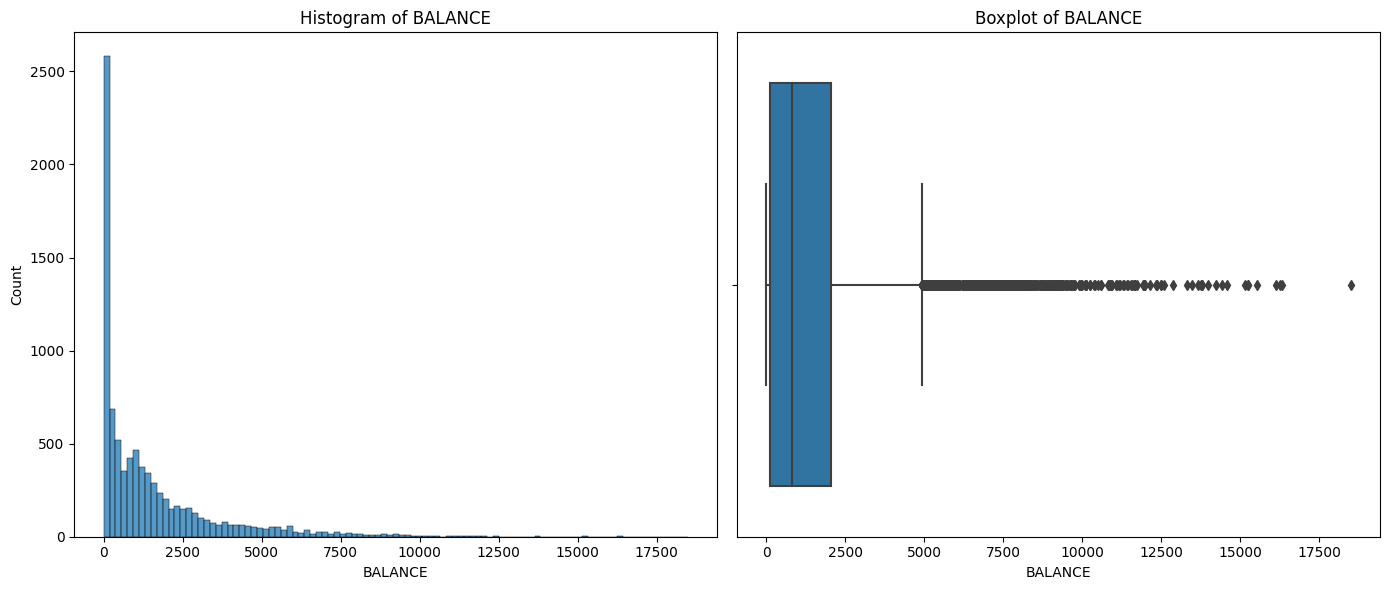

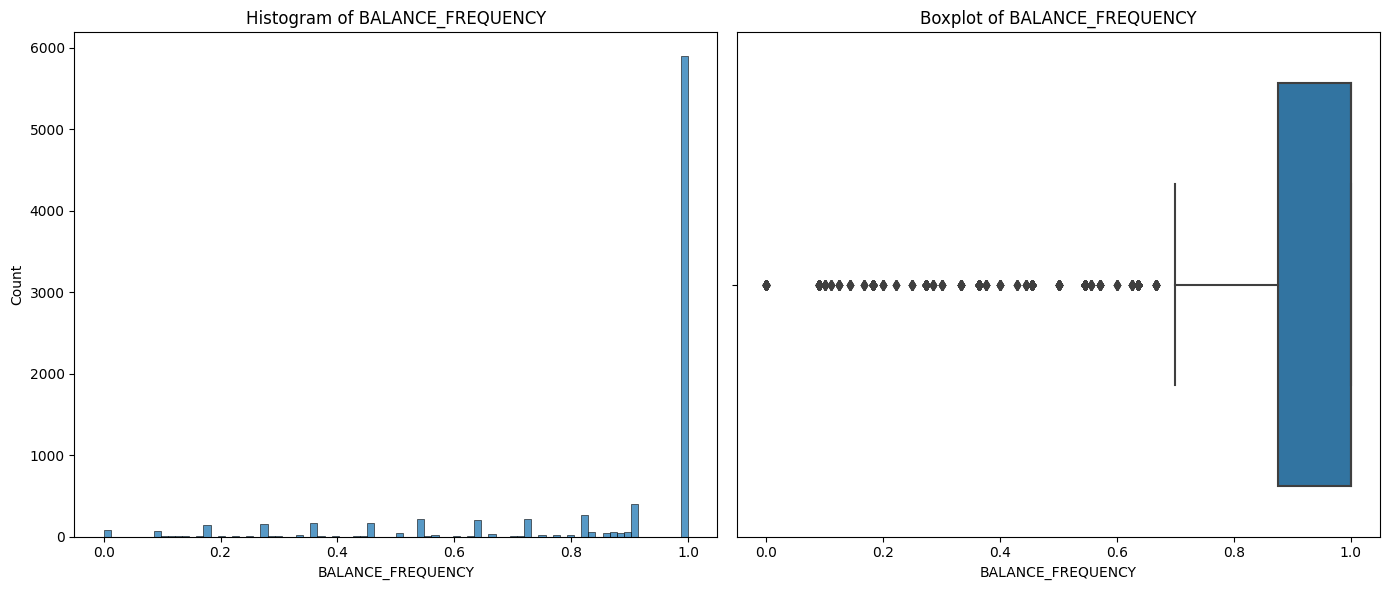

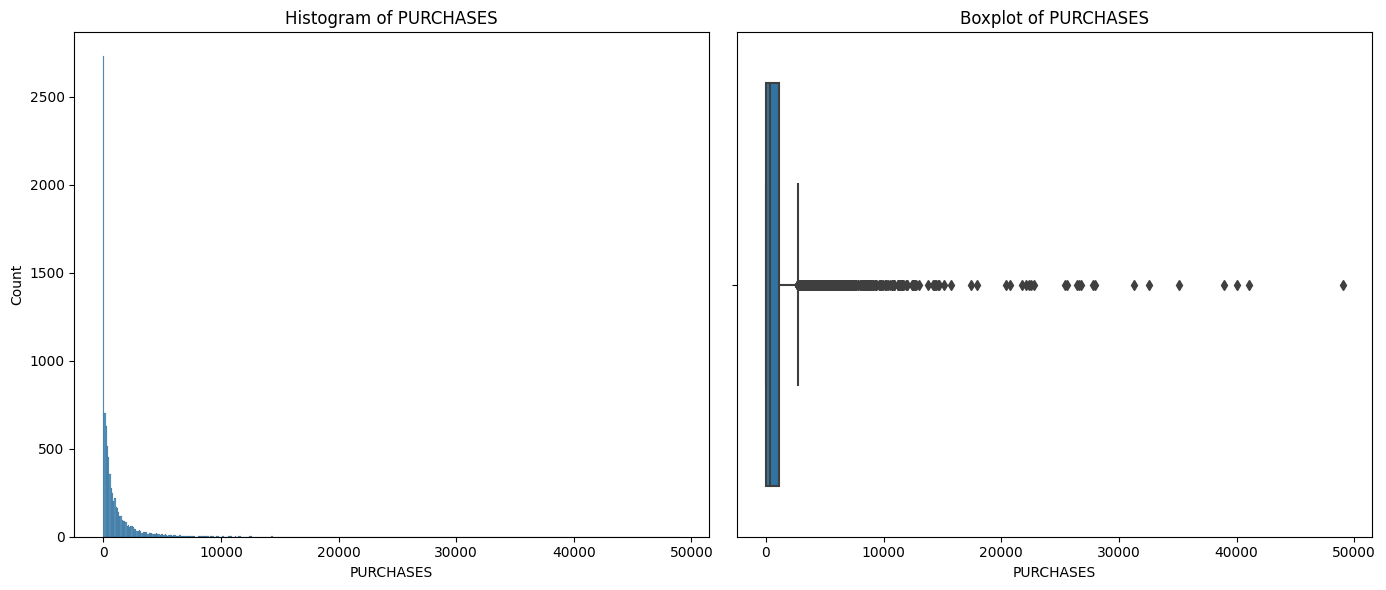

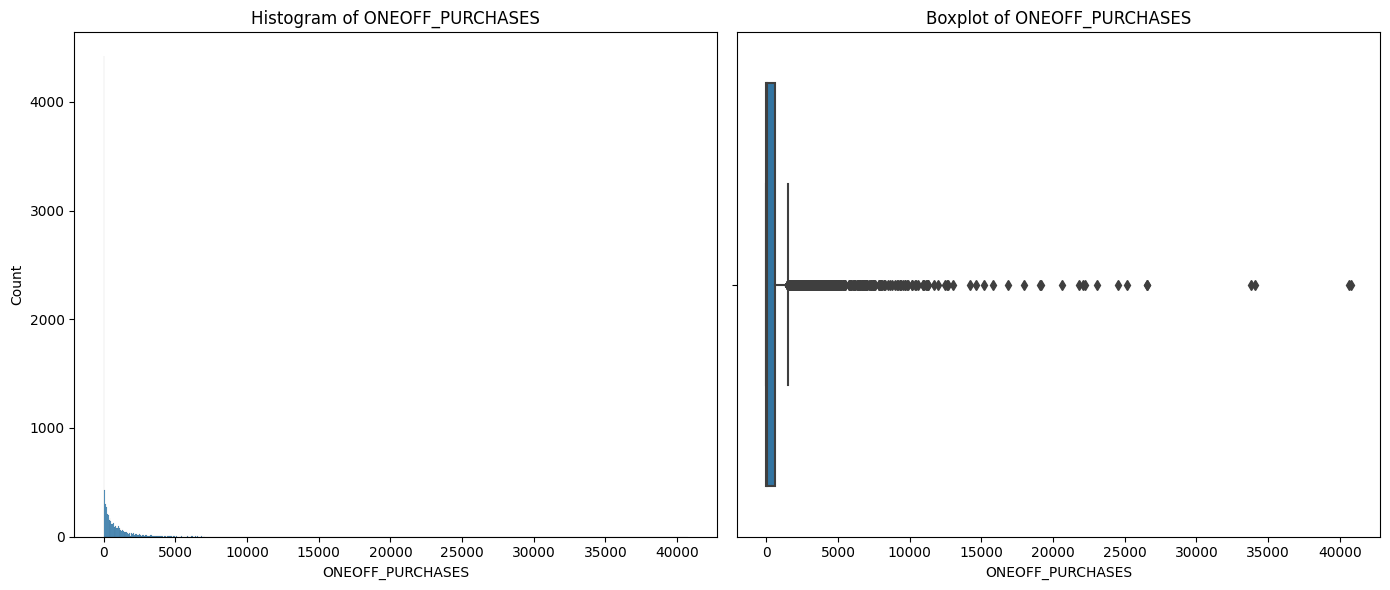

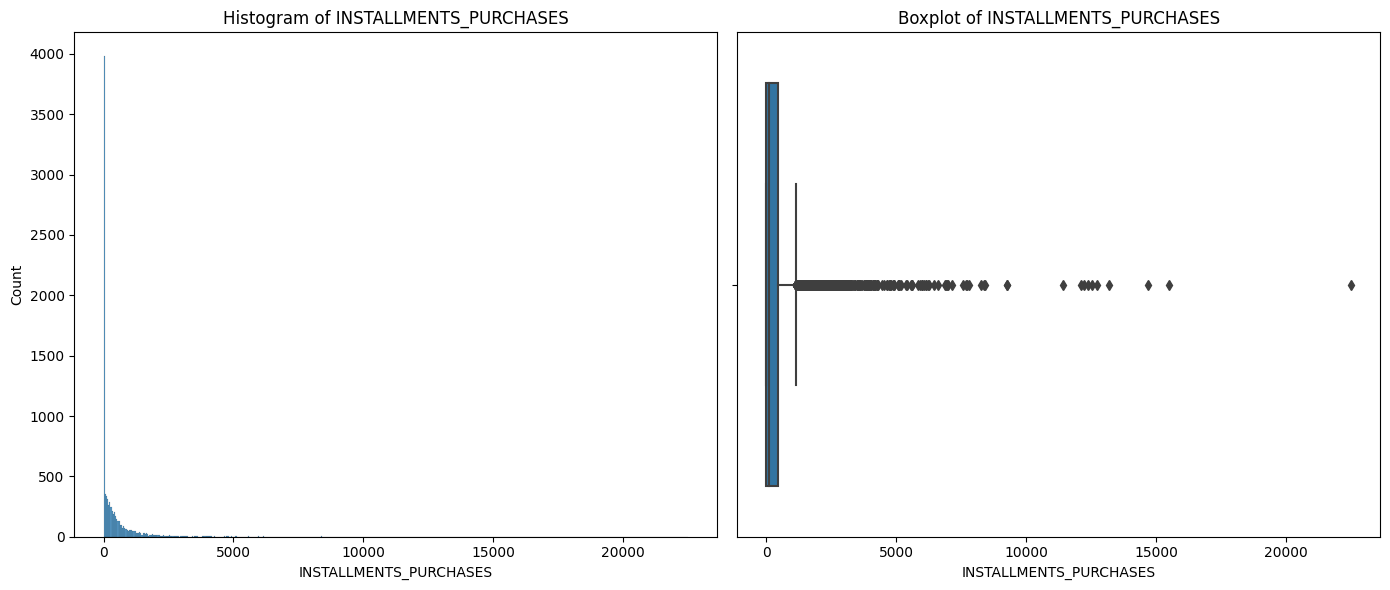

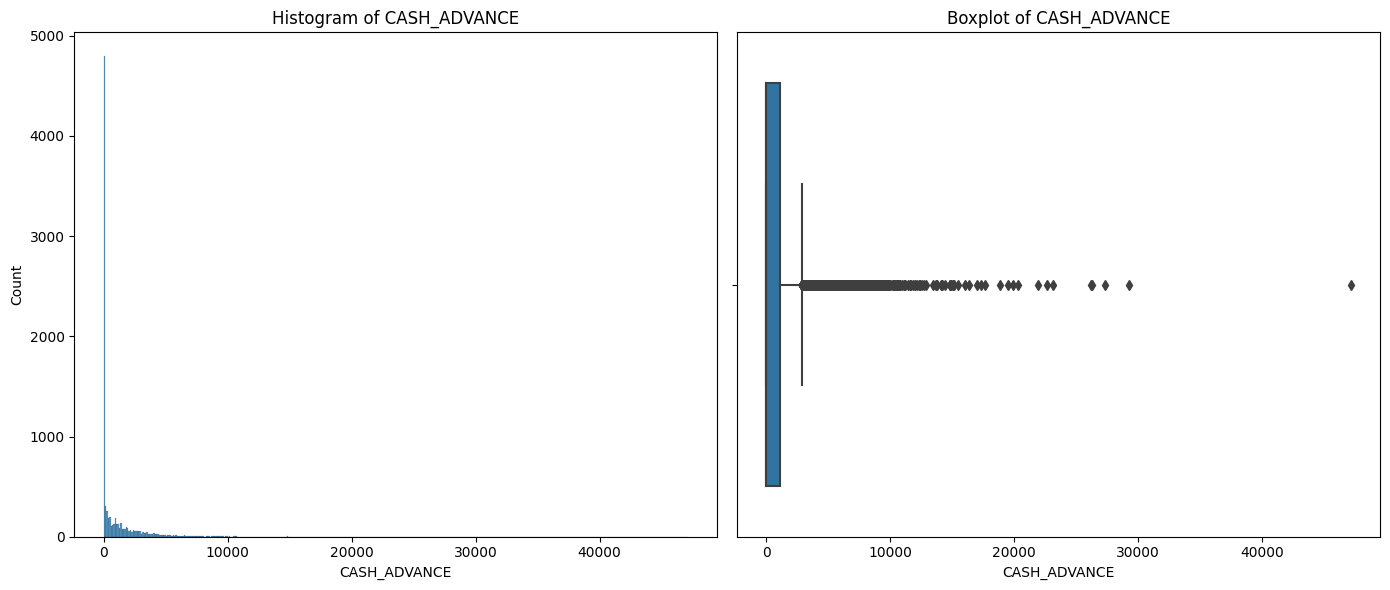

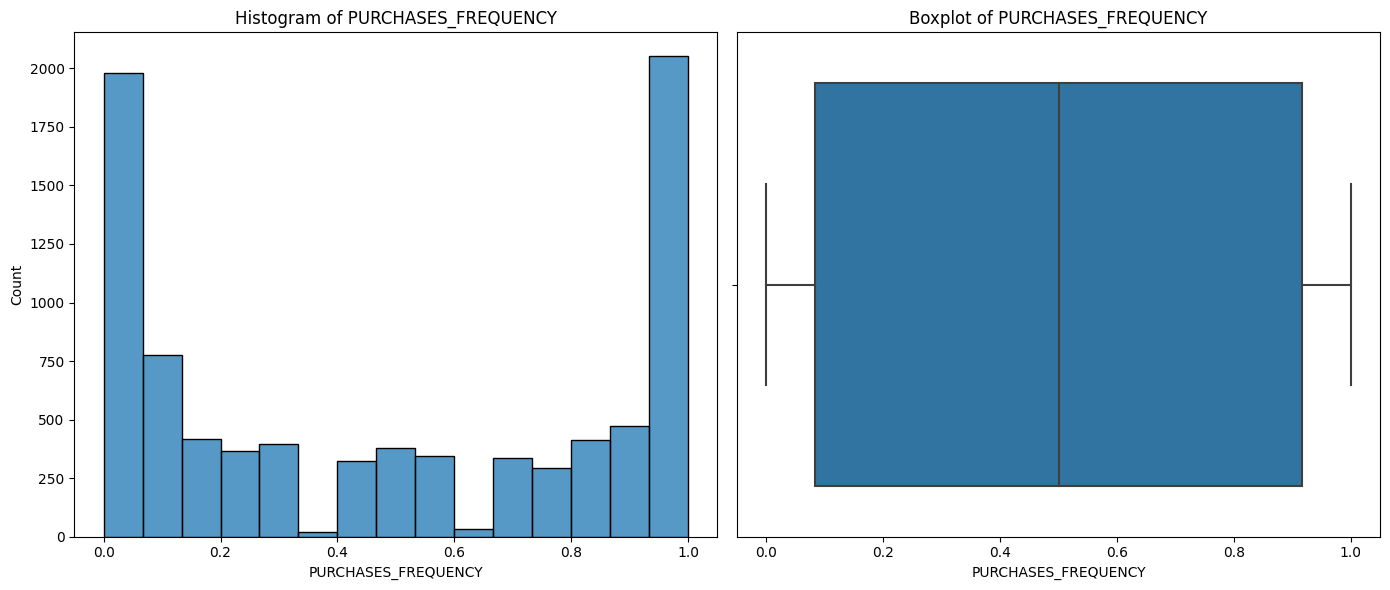

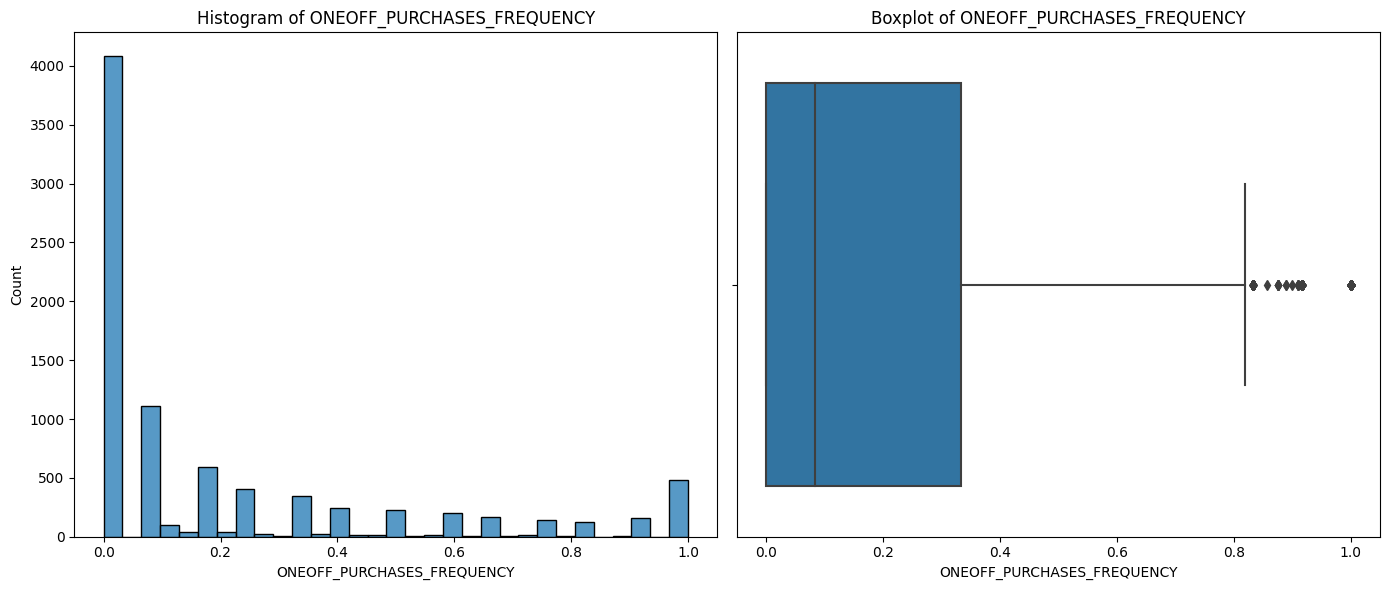

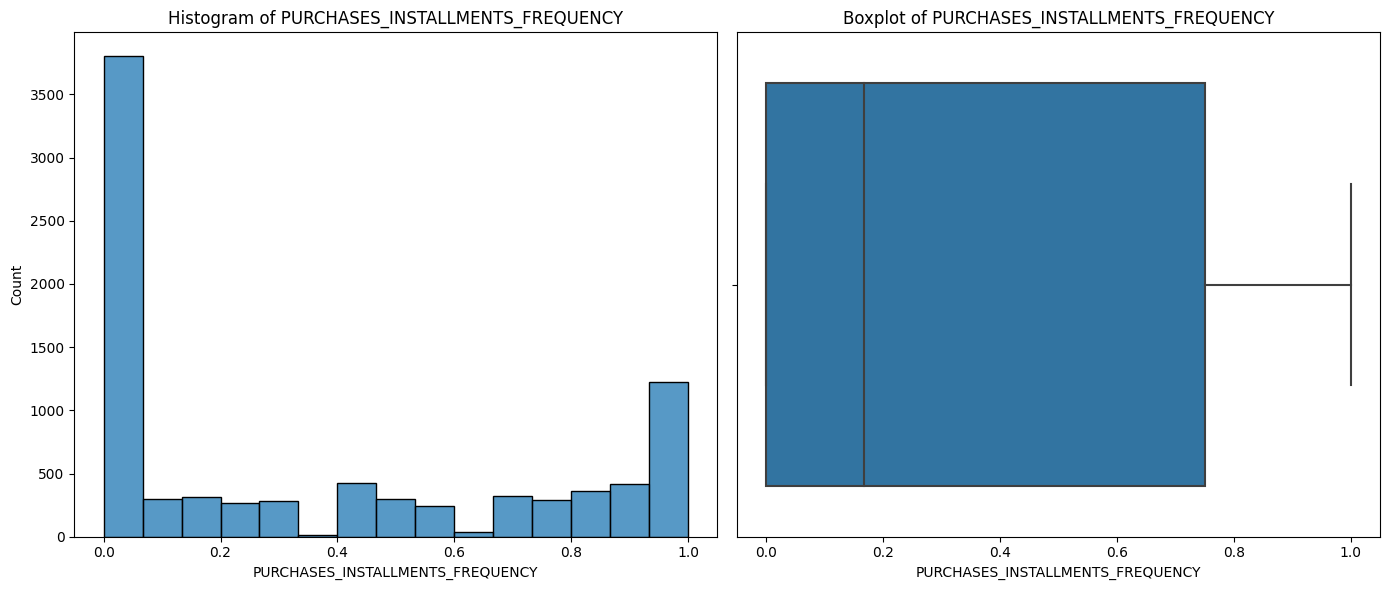

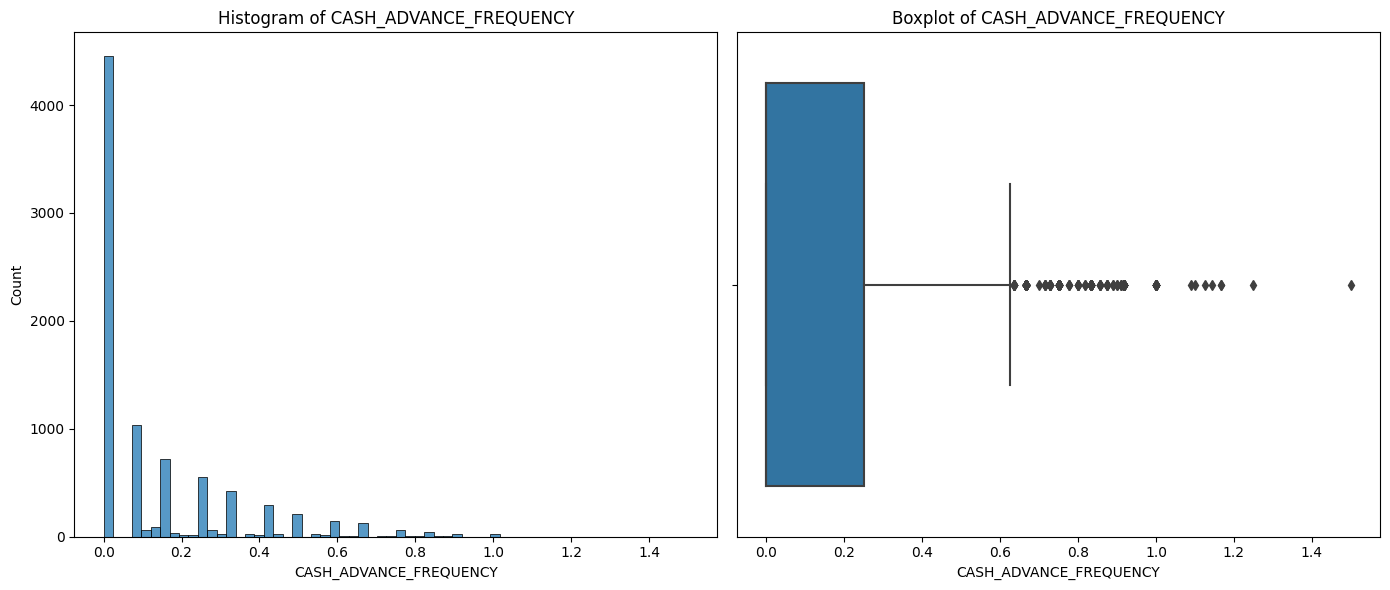

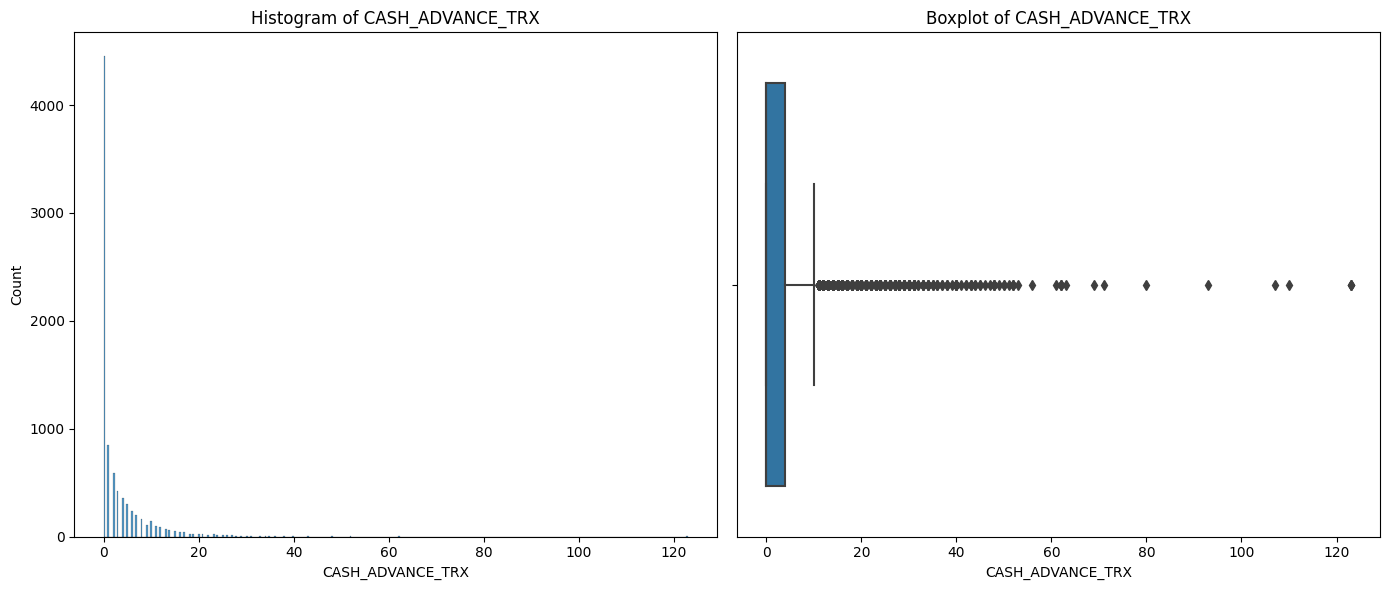

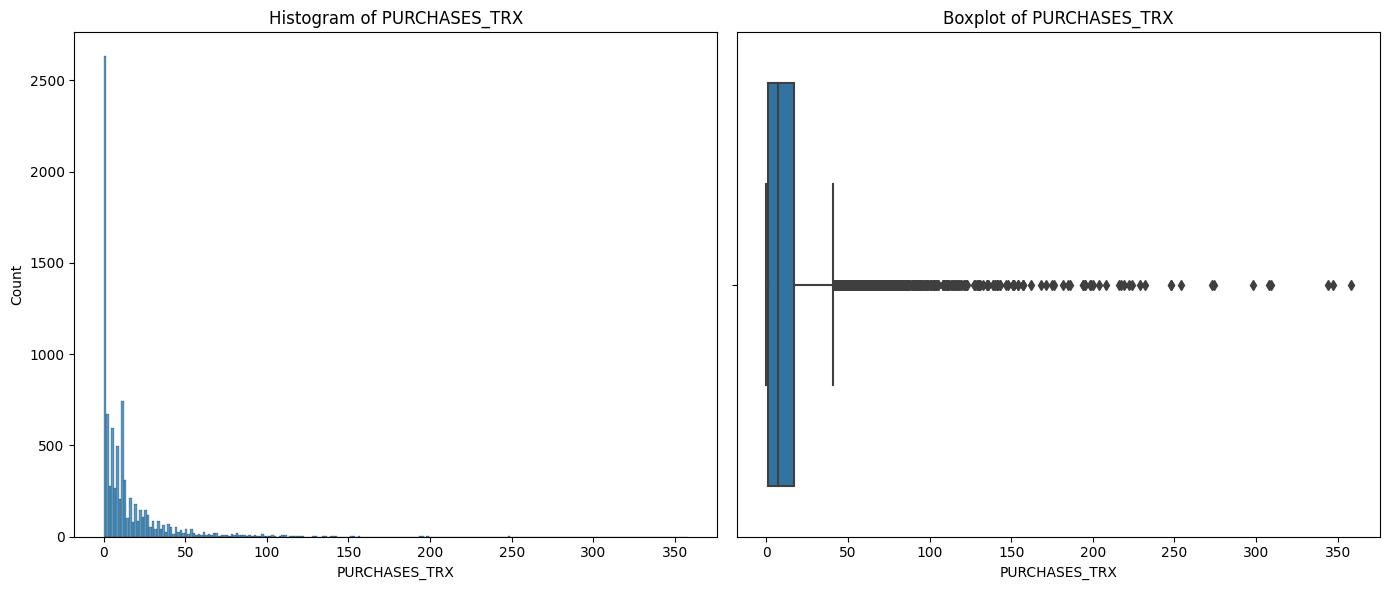

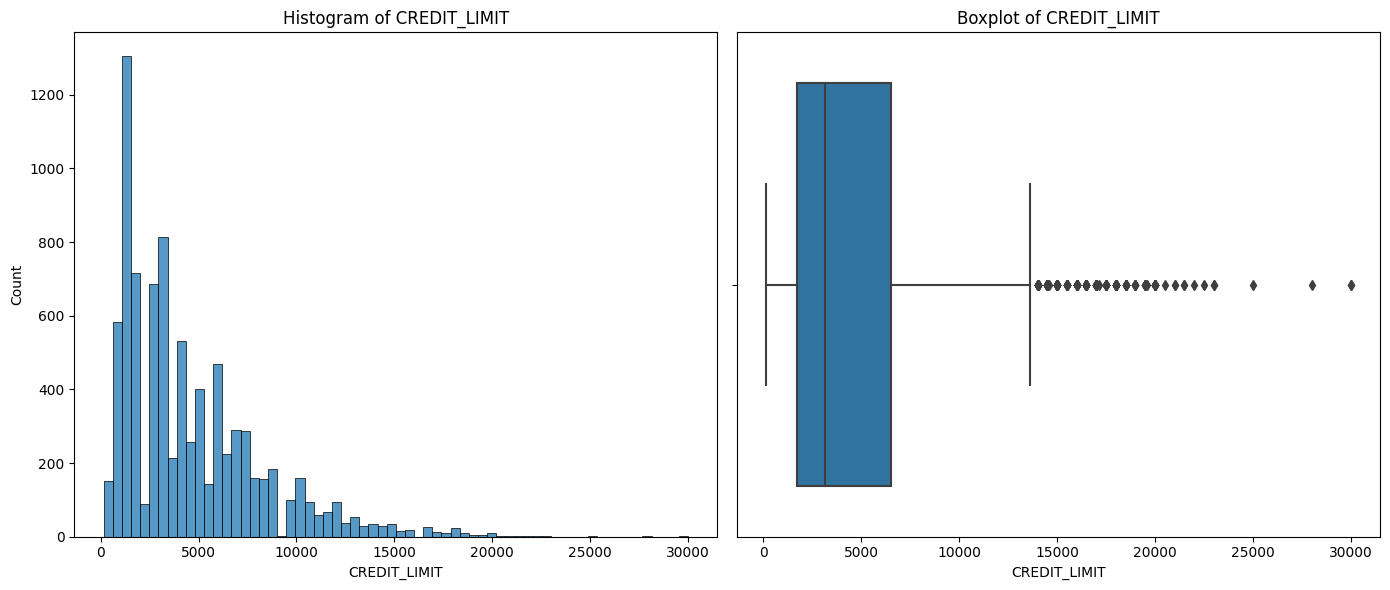

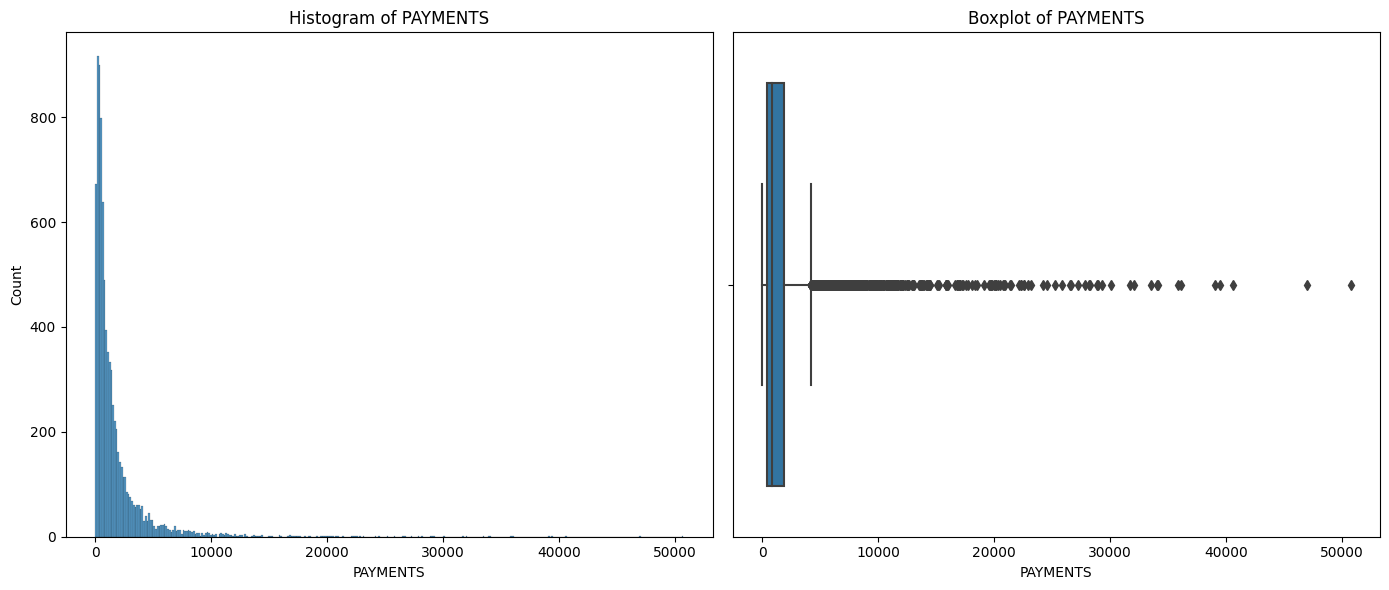

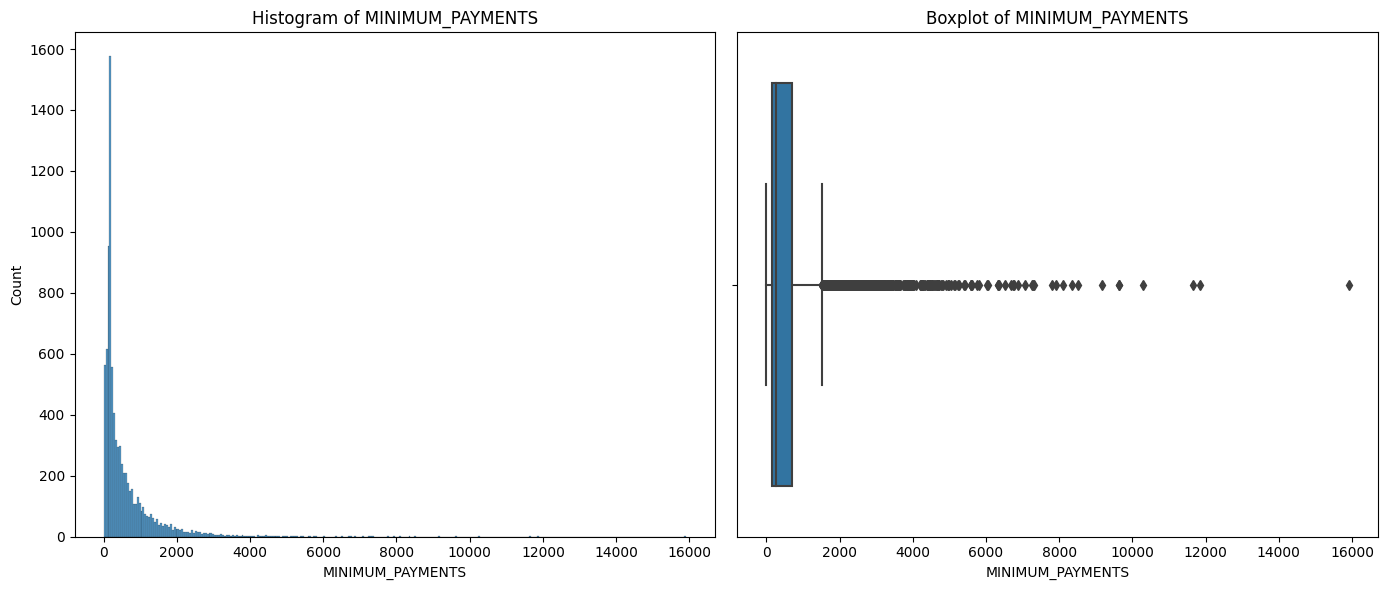

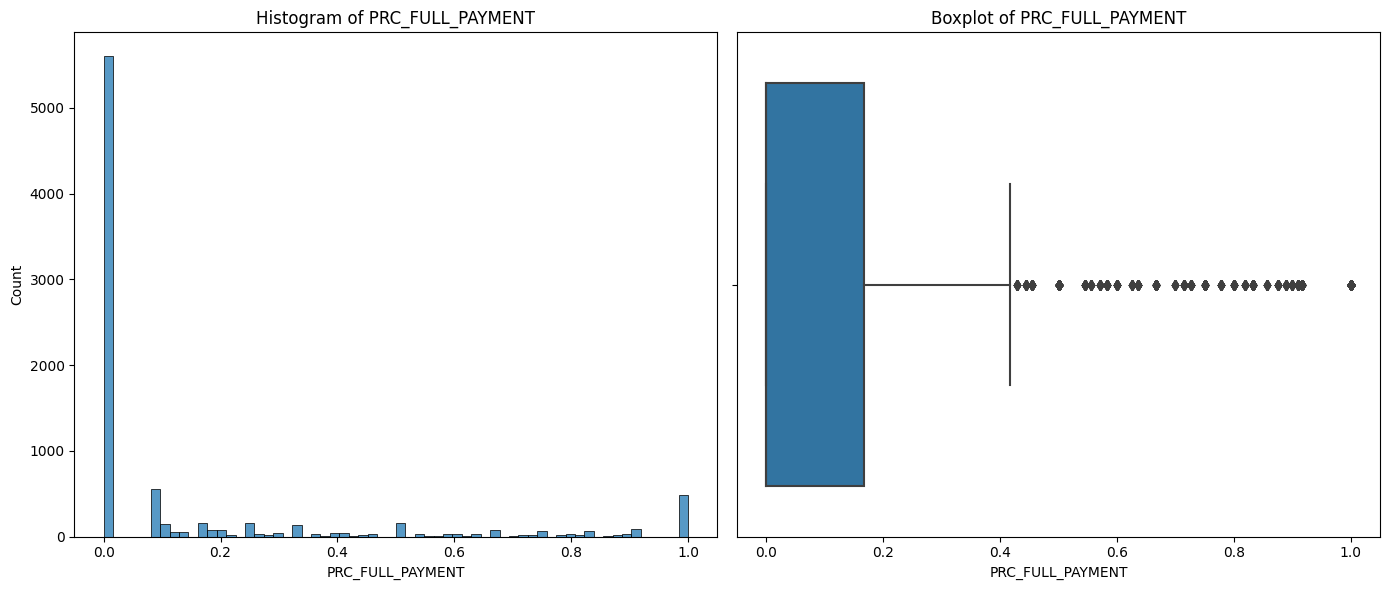

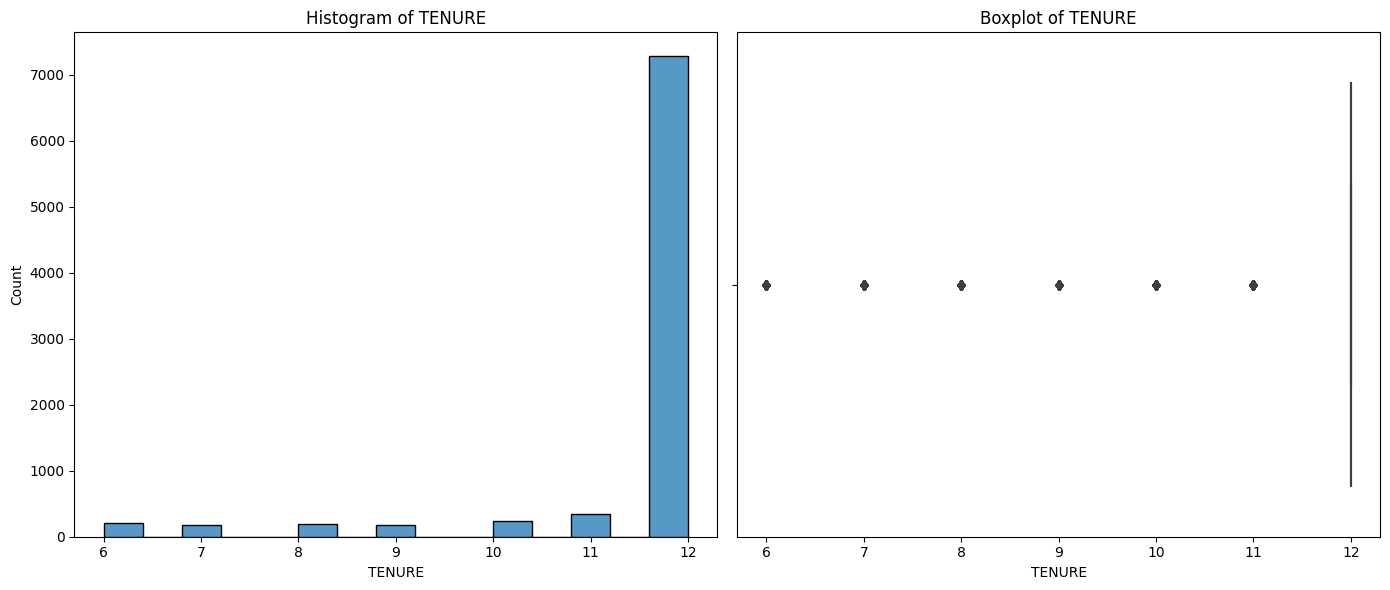

In [18]:
for col in df.columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    sns.histplot(df[col], ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [19]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8603.0,1543.370171,2074.446697,0.0,117.040124,826.688625,2037.509109,18495.55855
BALANCE_FREQUENCY,8603.0,0.873006,0.240265,0.0,0.875000,1.000000,1.000000,1.00000
PURCHASES,8603.0,1003.824758,2150.132533,0.0,37.000000,356.800000,1106.510000,49039.57000
ONEOFF_PURCHASES,8603.0,606.689443,1684.547079,0.0,0.000000,45.650000,600.505000,40761.25000
INSTALLMENTS_PURCHASES,8603.0,397.412873,879.786380,0.0,0.000000,83.430000,452.735000,22500.00000
CASH_ADVANCE,8603.0,992.087190,2109.739724,0.0,0.000000,0.000000,1140.583967,47137.21176
PURCHASES_FREQUENCY,8603.0,0.486336,0.400687,0.0,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8603.0,0.207133,0.301500,0.0,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8603.0,0.357814,0.394627,0.0,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8603.0,0.136181,0.200944,0.0,0.000000,0.000000,0.250000,1.50000


    EDA Findings

1. Balance & Balance_Frequency:
   - A significant number of customers have a balance less than $2054, and only a few have a high balance. This indicates that many customers do not maintain a high outstanding balance on their credit cards. Also, we need to look at customer's credit limit to consolidate this finding.
   - A high number of customers have a balance frequency close to 1, indicating that these customers are using their credit cards almost every time. There's also a smaller peak closer to 0, suggesting that a segment of customers rarely uses their credit card or maintains a balance.


2. Purchases& Purchases TRX: 
   - The majority of customers have lower purchase values. 50% of the customers have less than $361 purchase values. Only a few customers make high-value purchases.
   - A significant number of customers have a lower range of purchase transactions. However, as the number of transactions increases, the number of customers decreases.


3. Oneoff_Purchases & Oneoff_Purchases Frequency: 
   - 75% of the customers customers rarely make one-off purchases. However, there's a smaller group of customers that make one-off purchases more frequently.


4. Installments_Purchases & Installments_Purchases Frequency:
   - Most customers have made very few or no Installments purchases.
   - Installment purchases are rare for a majority of the dataset. However, there's a notable amount of individuals with a frequency close to 1, suggesting that there's a group of customers who make installment purchases quite frequently.


5. Cash Advance & Cash Advance Frequency & Cash Advance TRX: 
   - Most of the customers seem to take minimal cash advance.
   - More than 50% of customers have a cash advance frequency near 0, indicating they rarely or never take cash advances.


6. Payments & Minimum Payments & PRC_Full_Payment:
   - Most payments are in the lower range (less than $1900), with a sharp decline as the payment amount increases.
   - Majority of the minimum payments are below $289.
   - A vast majority of the percentage of full payment are near 0, indicating that many customers do not pay off their full balance.


7. Credit Limit:
   - Most customers have a credit limit in the lower range, probably between $50 - $6500.


8. Tenure: 
   - Most customers have a tenure of 12 (assuming years). Fewer customers have tenures between 6-11 years.

    Feature Scaling

In [20]:
#We will scale the data before we do the clustering by MinMaxScaler as the data has different scales and are not normally distributed.
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002211,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.028476,0.003979,0.008766,0.000000,1.0
1,0.173148,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.229481,0.080893,0.067381,0.222222,1.0
2,0.134905,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.246231,0.012264,0.039416,0.000000,1.0
3,0.090112,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.246231,0.000000,0.000000,0.000000,1.0
4,0.044211,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.035176,0.013374,0.015382,0.000000,1.0


    PCA - Reduce Dimentionality

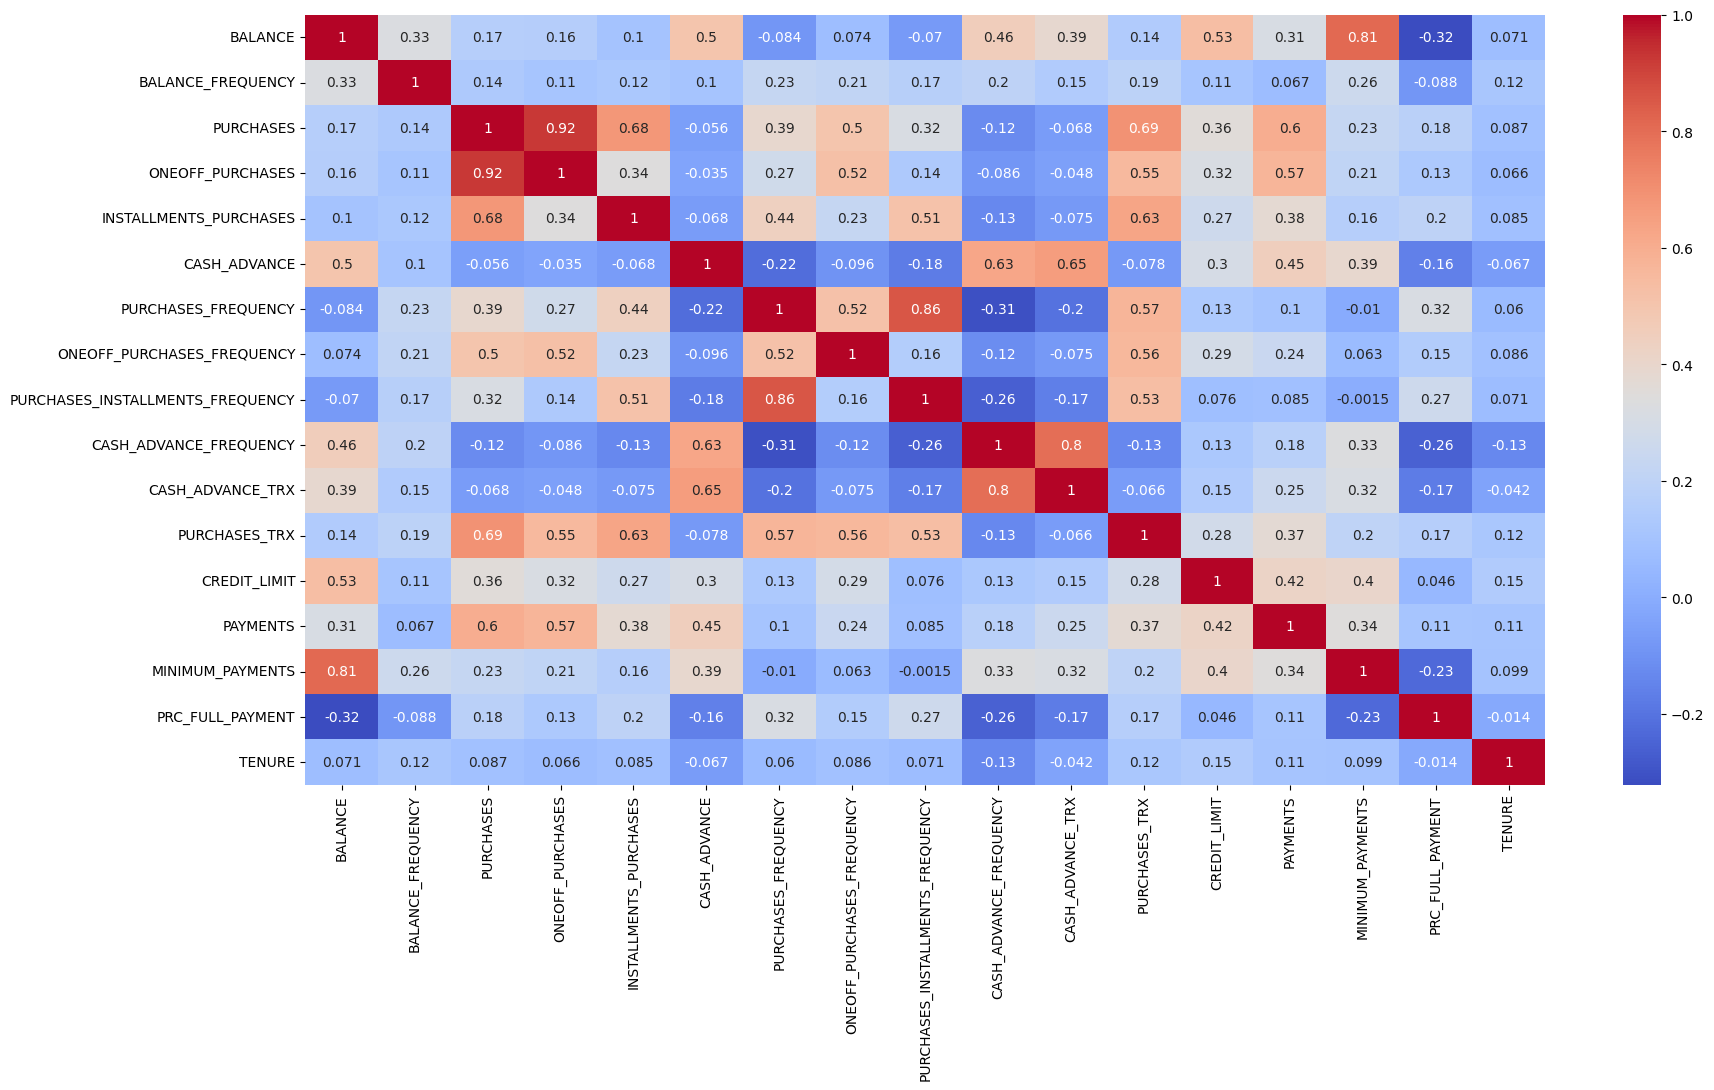

In [21]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

In [22]:
# we will now use pca to reduce the dimension of the dataset
pca = PCA()
df_pca = pca.fit_transform(df_scaled)
components_name = [f'PC{i+1}' for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=components_name)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-0.479297,-0.082670,-0.064565,-0.051831,-0.113313,-0.177567,-0.022091,0.015676,0.014409,0.024570,-0.002302,-0.011249,0.005111,0.000673,-0.002837,-0.003407,-6.737956e-06
1,-0.601672,-0.031438,0.072780,-0.229540,0.090912,0.137326,-0.045354,0.005677,0.005071,-0.000871,0.058242,-0.029572,-0.042065,-0.014278,0.002115,-0.049816,2.350886e-07
2,0.322339,0.884133,0.221059,0.173862,-0.154967,-0.152851,-0.005676,-0.279119,0.003339,-0.014662,-0.002179,-0.011847,-0.008646,0.011767,-0.020668,0.009606,-1.196630e-06
3,-0.583404,-0.012575,0.037002,0.015083,-0.220829,0.060802,-0.093338,-0.012012,-0.055140,-0.006887,-0.031880,0.029182,0.016967,-0.027167,-0.023848,-0.009446,-6.367103e-07
4,-0.549122,0.074291,-0.063854,-0.133069,0.008762,-0.211361,-0.059071,0.052744,0.025280,0.003478,0.014694,-0.010003,0.002540,0.000037,-0.007639,0.005473,-3.498135e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8598,0.648583,-0.510357,0.068084,0.573983,0.698488,-0.145639,-0.091697,-0.084267,0.027061,0.020458,0.019929,-0.004122,0.010168,-0.008320,0.000573,0.013088,-8.319863e-06
8599,0.545312,-0.354110,-0.327311,0.749127,0.547003,-0.196275,-0.106181,-0.087012,-0.009580,0.049133,0.023924,-0.005737,0.009681,-0.005853,-0.000146,0.013419,-9.358186e-06
8600,0.360354,-0.443750,-0.018268,0.714983,0.523633,-0.129695,-0.095644,-0.073016,0.022658,0.025036,0.014423,-0.008141,0.011439,-0.007393,0.003478,0.011963,-7.955174e-06
8601,-0.639056,-0.262944,0.222628,0.597201,0.611075,-0.101171,-0.094013,0.122322,0.005511,-0.006418,-0.005713,-0.002127,0.005875,0.007005,0.008950,0.012575,-3.603512e-06


In [23]:
#lets check the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_df = pd.DataFrame(explained_variance_ratio, index=components_name, columns=['Explained Variance Ratio'])

cumulative_variance = np.cumsum(explained_variance_ratio)

cumulative_variance_df = pd.DataFrame(cumulative_variance, index=components_name, columns=['Cumulative Explained Variance'])
print(cumulative_variance_df)


      Cumulative Explained Variance
PC1                        0.491096
PC2                        0.632669
PC3                        0.760386
PC4                        0.837981
PC5                        0.909027
PC6                        0.946072
PC7                        0.964331
PC8                        0.978133
PC9                        0.985505
PC10                       0.991126
PC11                       0.993950
PC12                       0.995809
PC13                       0.997097
PC14                       0.998225
PC15                       0.999288
PC16                       1.000000
PC17                       1.000000


In [24]:
#Look at the weights for each original variable in each principal component
loadings = pd.DataFrame(pca.components_.T, columns=components_name, index=df_scaled.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
BALANCE,-0.016810,0.139021,-0.138469,-0.065151,0.098913,0.456298,-0.182774,-0.170082,0.635184,-0.307487,0.005808,0.074559,-0.075044,-0.186771,-0.338889,0.132987,5.734562e-06
BALANCE_FREQUENCY,0.103598,0.349399,-0.297666,-0.457974,0.673568,-0.303652,-0.119531,0.042208,-0.072421,0.032421,0.016920,-0.013252,0.005191,0.001225,0.009447,0.000411,1.989654e-06
PURCHASES,0.033379,0.043658,0.020714,-0.000681,-0.008497,0.074785,-0.093479,0.141586,0.097890,0.396300,-0.146428,0.319398,0.223192,0.014750,-0.179533,-0.252585,-7.252205e-01
ONEOFF_PURCHASES,0.021115,0.053029,0.027831,0.005149,-0.009097,0.056166,-0.074467,0.105939,0.094128,0.356099,-0.053542,0.432249,0.312810,-0.366215,0.059232,-0.227181,6.028924e-01
INSTALLMENTS_PURCHASES,0.034509,-0.000945,-0.005279,-0.010817,-0.002049,0.061245,-0.068878,0.116675,0.042834,0.218789,-0.222376,-0.087203,-0.080401,0.696065,-0.498951,-0.138897,3.325297e-01
CASH_ADVANCE,-0.017238,0.019262,-0.024645,-0.010042,0.049072,0.164329,0.095592,-0.039772,0.006226,0.090184,0.436684,-0.406535,-0.165746,-0.164454,-0.086359,-0.729645,1.408563e-05
PURCHASES_FREQUENCY,0.683749,0.082165,-0.035446,0.152579,-0.050708,-0.121596,0.143407,-0.637962,0.056945,0.206816,-0.089148,-0.027716,-0.027848,-0.016713,-0.020561,0.008543,-1.980279e-05
ONEOFF_PURCHASES_FREQUENCY,0.257541,0.753036,0.356642,0.206183,-0.135612,0.005199,0.058436,0.334938,-0.025942,-0.214617,0.112891,0.026901,0.004731,0.051193,0.000724,-0.006511,2.164486e-05
PURCHASES_INSTALLMENTS_FREQUENCY,0.628555,-0.364274,-0.336833,-0.014732,-0.027035,0.171269,-0.038367,0.503891,-0.068055,-0.217088,0.124458,0.065866,0.028174,0.002504,0.025552,-0.008238,2.269920e-05
CASH_ADVANCE_FREQUENCY,-0.074835,0.083458,-0.111449,-0.013947,0.230932,0.450071,0.724288,0.007125,-0.183343,0.012134,-0.228345,0.233040,-0.214547,0.029869,0.083194,-0.015088,8.674363e-06


In [25]:
#we will use the first 5 components to do the clustering, as they explain 90.9% of the variance
df_pca = df_pca.iloc[:, :5]
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.479297,-0.082670,-0.064565,-0.051831,-0.113313
1,-0.601672,-0.031438,0.072780,-0.229540,0.090912
2,0.322339,0.884133,0.221059,0.173862,-0.154967
3,-0.583404,-0.012575,0.037002,0.015083,-0.220829
4,-0.549122,0.074291,-0.063854,-0.133069,0.008762


# Clustering Algorithms

    KMeans Clustering

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

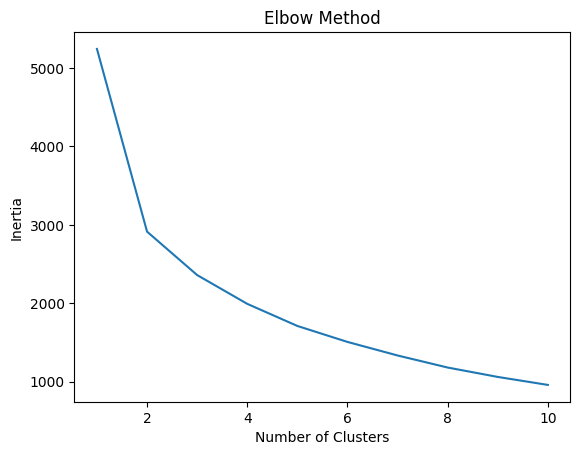

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

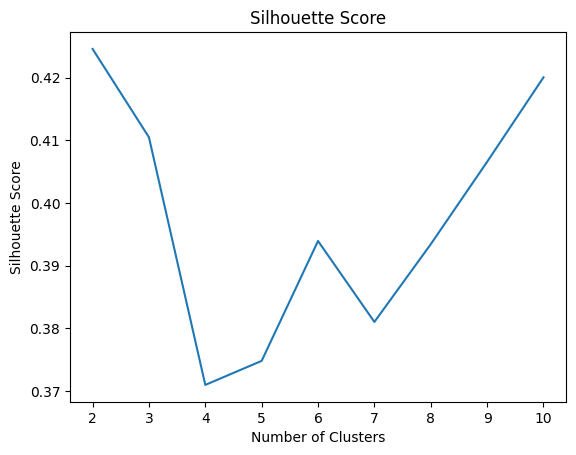

In [26]:
# 1. KMeans Clustering

#elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#silhouette score
silhouette = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    silhouette.append(silhouette_score(df_pca, kmeans.labels_))
plt.plot(range(2, 11), silhouette)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


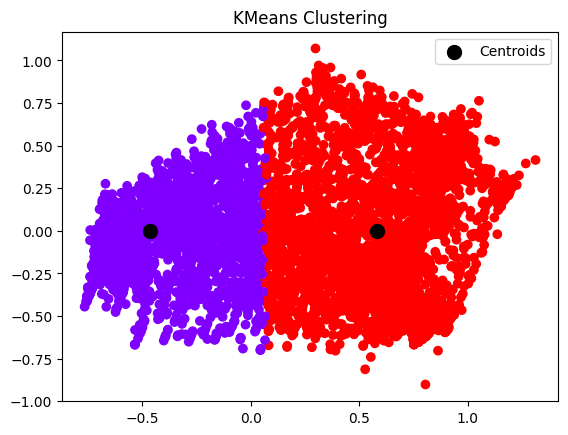

In [27]:
kmeans = KMeans(n_clusters=2, random_state=100)
kmeans.fit(df_pca)

#Scatter plot
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

    Hierarchical Clustering

In [28]:
complete_clustering = linkage(df_pca, method="complete", metric="euclidean")
average_clustering = linkage(df_pca, method="average", metric="euclidean")
single_clustering = linkage(df_pca, method="single", metric="euclidean")
ward_clustering = linkage(df_pca, method="ward", metric="euclidean")

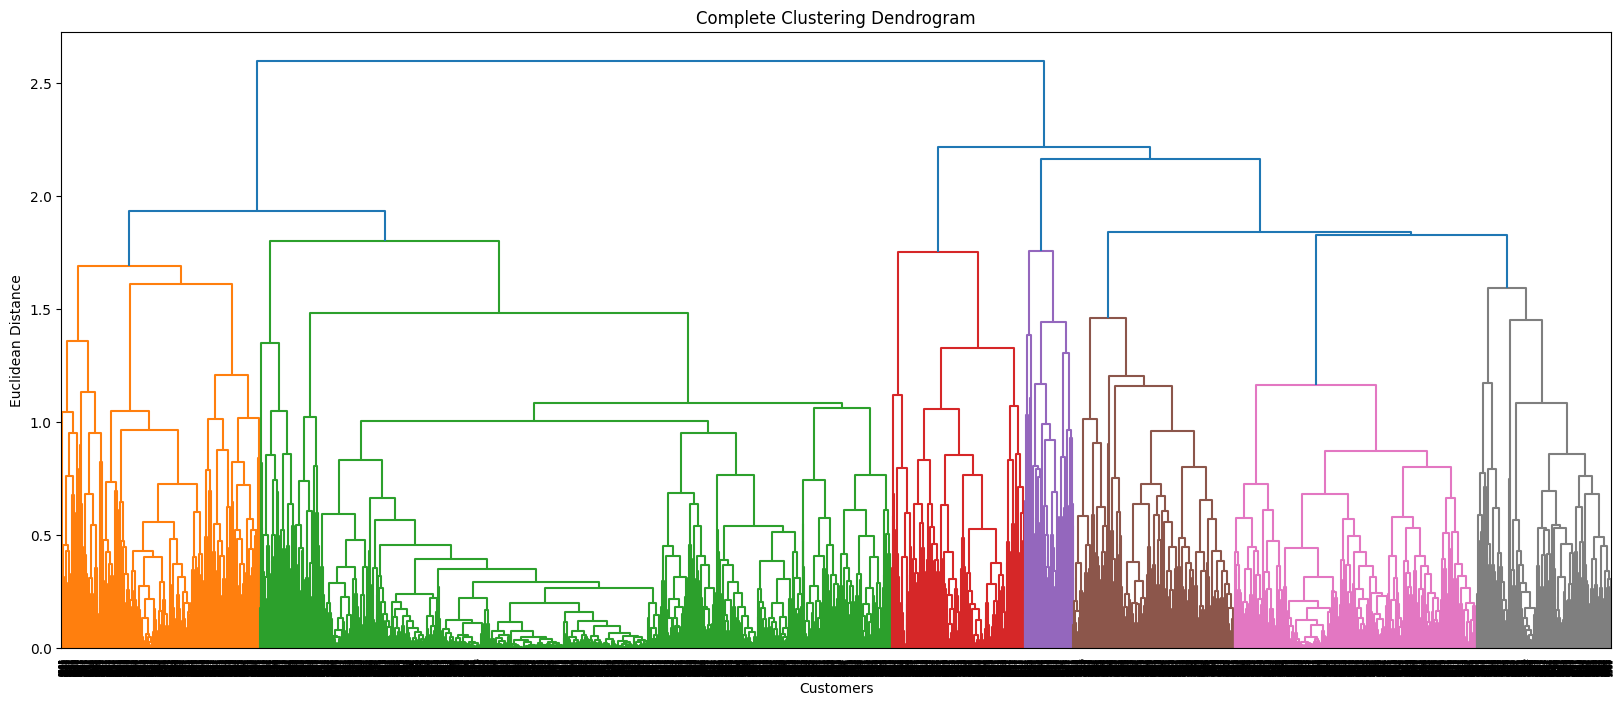

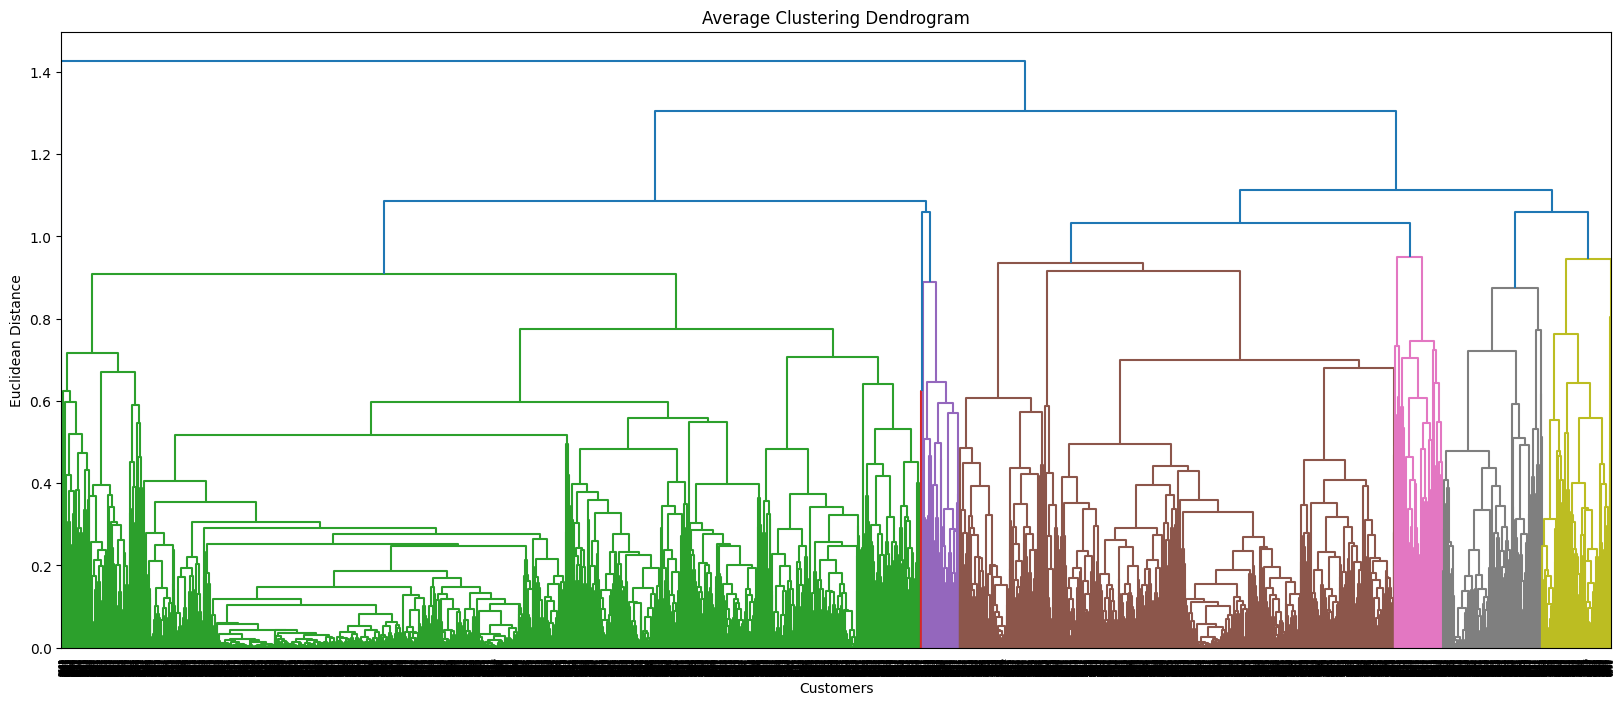

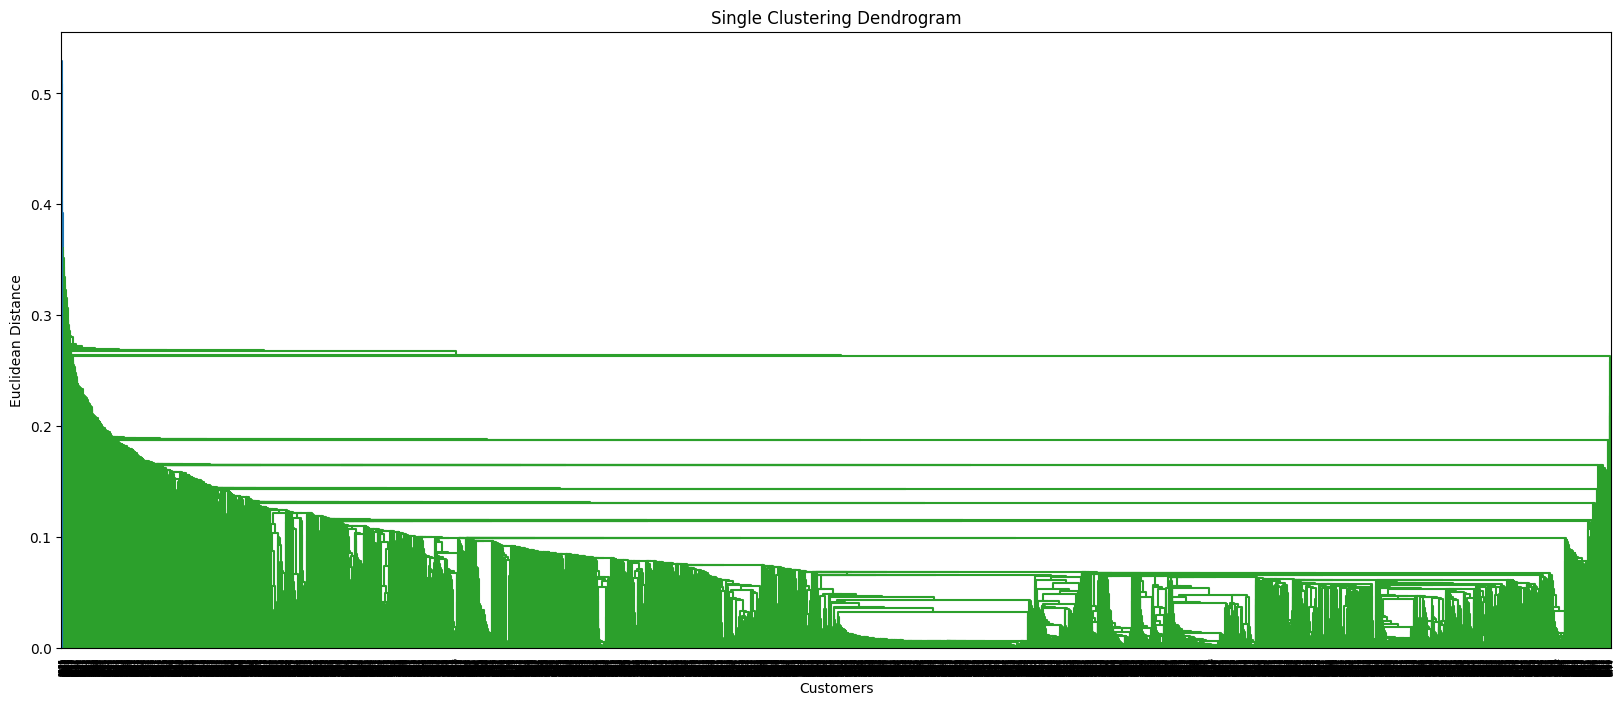

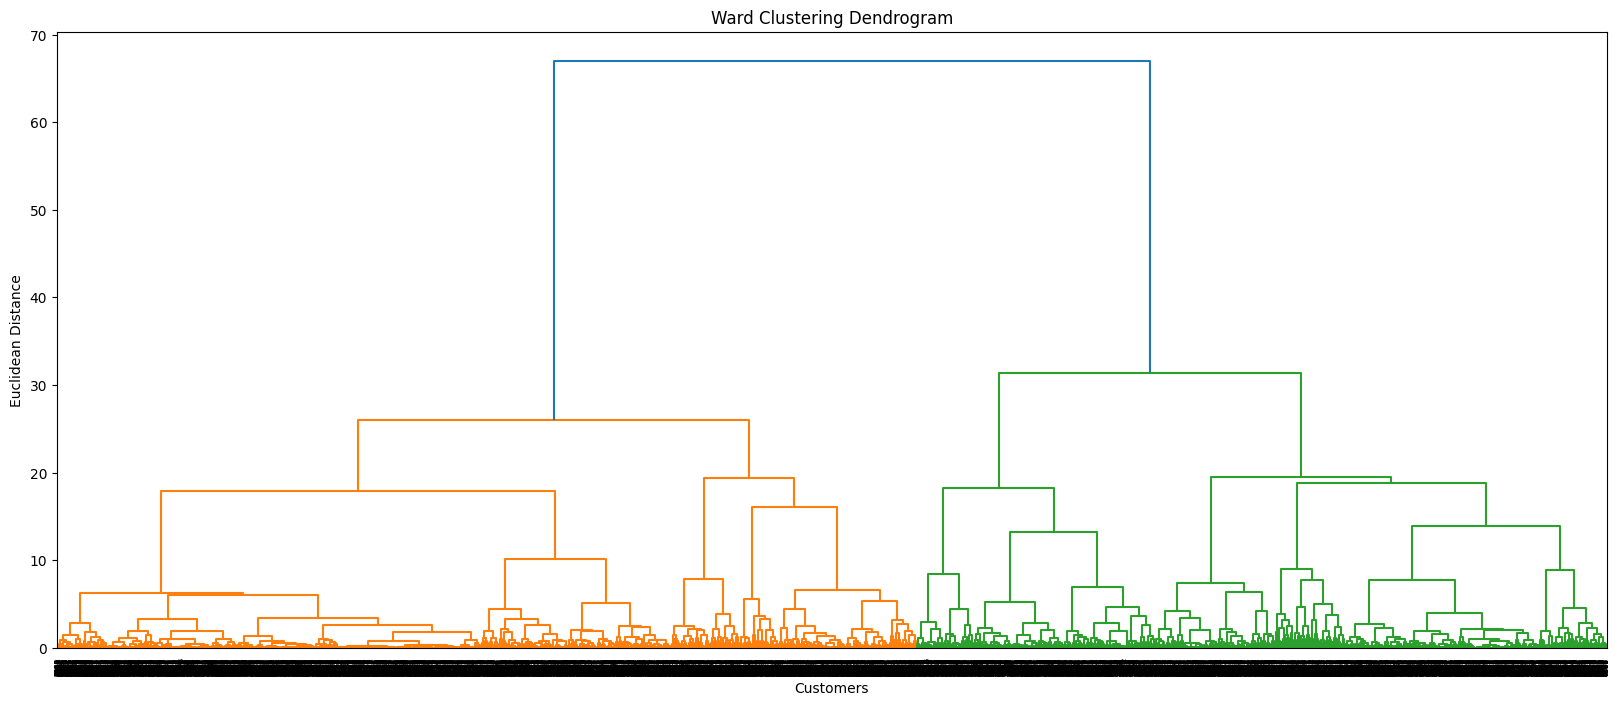

In [29]:
# Plot the dendrogram for each clustering method
for linkage_matrix, method_name in zip([complete_clustering, average_clustering, single_clustering, ward_clustering], 
                                      ["Complete", "Average", "Single", "Ward"]):
    plt.figure(figsize=(20, 8))
    dendrogram(linkage_matrix)
    plt.title(f'{method_name} Clustering Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean Distance')
    plt.show()


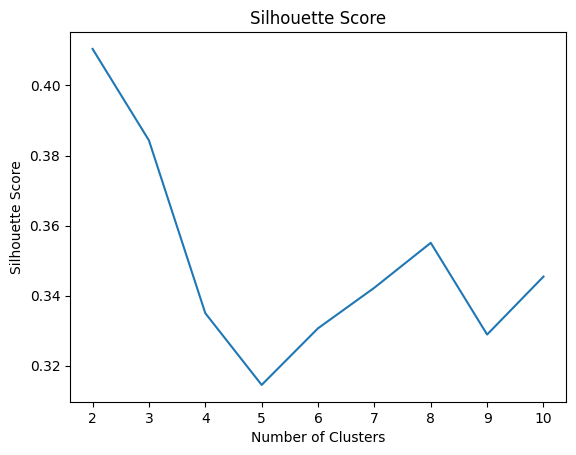

In [30]:
#lets find the silhouette score for ward clustering
silhouette = []
for i in range(2, 11):
    labels = fcluster(ward_clustering, i, criterion='maxclust')
    silhouette.append(silhouette_score(df_pca, labels))
plt.plot(range(2, 11), silhouette)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


    DBSCAN

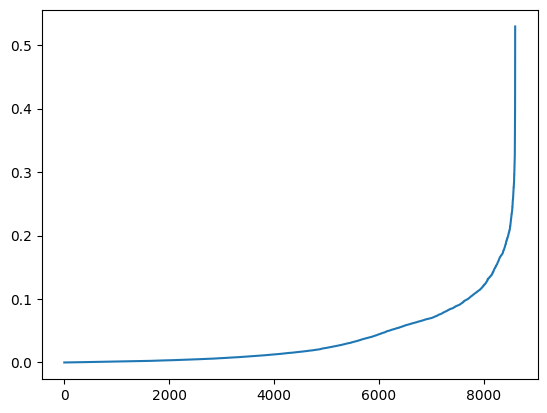

In [31]:
#find the optimal epsilon for DBSCAN
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

#it seems the optimal epsilon is around 0.35

In [32]:
#Lets consider eps range 0.05 to 0.4 and min sample range 5 to 30 and iterate over these combinations and get the best silhouette score.
min_samples_values = range(5, 30)
eps_values = np.arange(0.05, 0.4, 0.025)

output = []

for min_sample in min_samples_values:
    for ep in eps_values:
        dbscan = DBSCAN(eps=ep, min_samples=min_sample)
        labels = dbscan.fit_predict(df_pca)
        score = silhouette_score(df_pca, labels)
        output.append([min_sample, ep, score])


In [33]:
#get the parameters for the best silhouette score
output = pd.DataFrame(output, columns=['min_samples', 'eps', 'score'])
output.sort_values(by='score', ascending=False).head(10)
#the best silhouette score is 0.32, with min_samples=5 and eps=0.375

,min_samples,eps,score
13,5,0.375,0.321439
27,6,0.375,0.318909
41,7,0.375,0.318909
83,10,0.375,0.315388
125,13,0.375,0.305761
139,14,0.375,0.304400
97,11,0.375,0.303791
111,12,0.375,0.301697
153,15,0.375,0.301419
167,16,0.375,0.301166


In [34]:
#Compute DBSCAN
dbsc = DBSCAN(eps = .375, min_samples = 5).fit(df_pca)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

#Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 1
Estimated number of noise points: 11


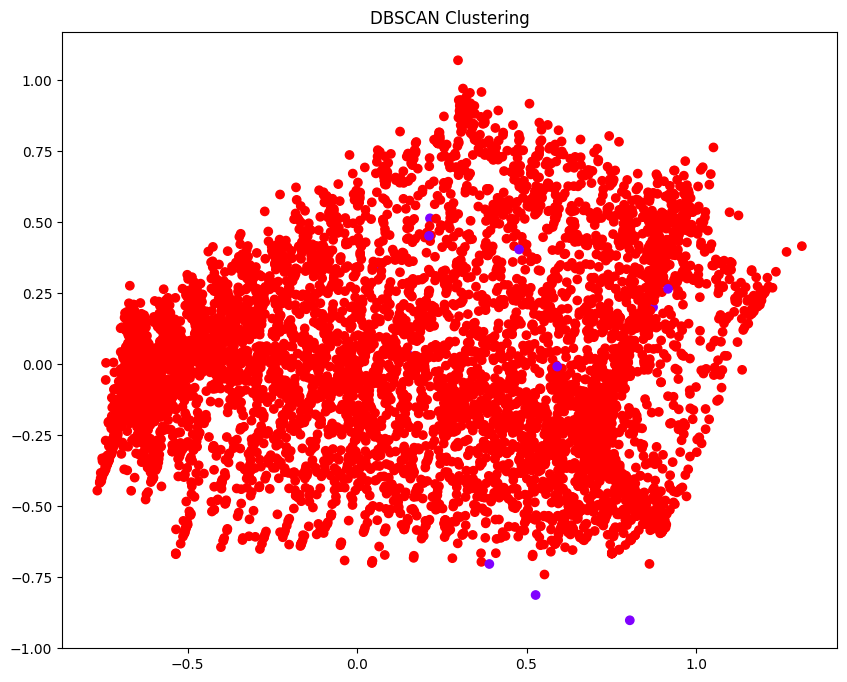

In [35]:
#Plot DBSCAN clustering
plt.figure(figsize=(10,8))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()

# Interpreting Clusters

In [36]:
#we will use kmeans clustering to cluster the data
#now lets figure out what kind of customers are in each cluster
df['cluster'] = kmeans.labels_
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


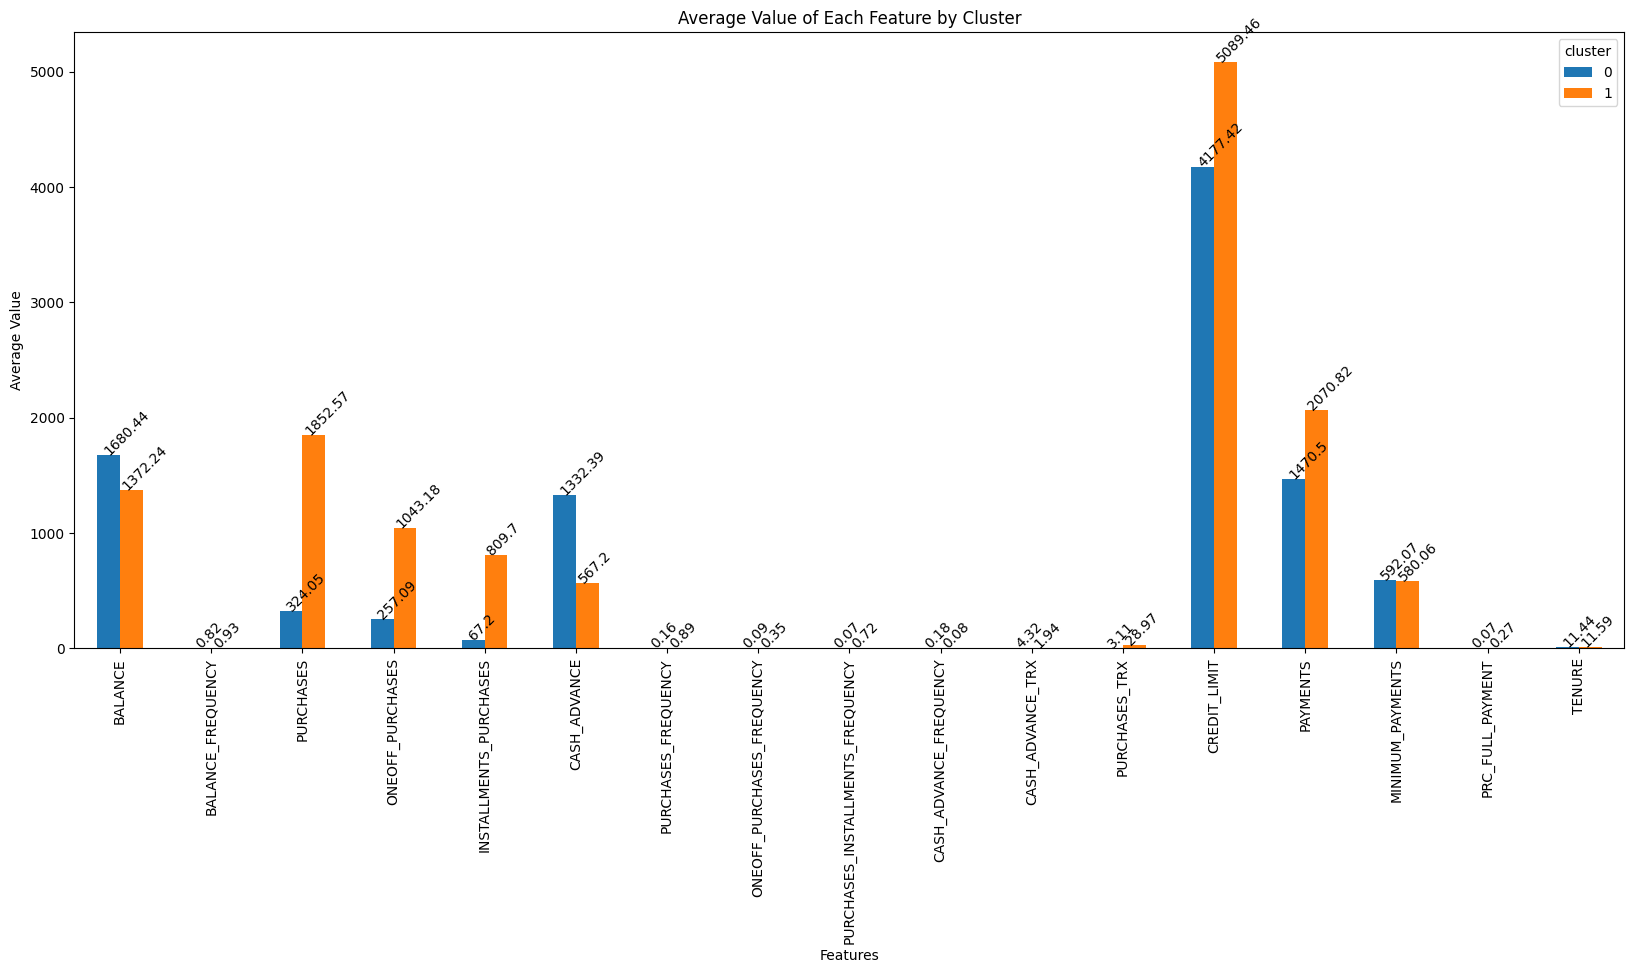

In [37]:
df.groupby('cluster').mean().T.plot(kind='bar', figsize=(20, 8))
#add specific value for each bar
for i in range(df.groupby('cluster').mean().T.shape[0]):
    plt.text(i-0.2, df.groupby('cluster').mean().T.iloc[i, 0]+0.01, round(df.groupby('cluster').mean().T.iloc[i, 0], 2), rotation=45)
    plt.text(i, df.groupby('cluster').mean().T.iloc[i, 1]+0.01, round(df.groupby('cluster').mean().T.iloc[i, 1], 2), rotation=45)
plt.title('Average Value of Each Feature by Cluster')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.show()

In [38]:
#make a table to show the value of each feature for each cluster
df.groupby('cluster').mean().T

#cluster 0 has the highest balance, cash advance, cash advance frequency, cash advance transactions.
#cluster 1 has the highest purchase, one off purchase, installments purchase, purchase frequency, purchase transaction, credit limit, payments.

cluster,0,1
BALANCE,1680.435272,1372.235831
BALANCE_FREQUENCY,0.823734,0.934525
PURCHASES,324.050745,1852.565076
ONEOFF_PURCHASES,257.091553,1043.184247
INSTALLMENTS_PURCHASES,67.202723,809.700873
CASH_ADVANCE,1332.389254,567.198804
PURCHASES_FREQUENCY,0.160549,0.893100
ONEOFF_PURCHASES_FREQUENCY,0.092021,0.350858
PURCHASES_INSTALLMENTS_FREQUENCY,0.067067,0.720830
CASH_ADVANCE_FREQUENCY,0.182977,0.077753


Cluster 0 customers are: Moderate Users with High Cash Advances, as they maintain higher average bof balance. Their overall purchase amount is low, especially when compared to Cluster 1. They have a notably high average cash advance amount and their average payment is comparatively lower. They purchase less frequently. Their credit limit is slightly lower than Cluster 1 but not by a significant margin.
 
Cluster 1 customers are: Active Shoppers, as they have significantly higher average total purchases amount, with a good mix of one-off and installment purchases and a high frequency of purchases. They have a slightly higher credit limit than Cluster 0. And their average payment is considerably higher than Cluster 0.

# Actionable Insights

- Provide business recommendations based on the clusters formed. How would you target different customer segments?

1. Cluster 0 comprises customers who frequently utilize their credit cards for cash advances and maintain a higher balance. They are less active in terms of actual purchasing.

Recommendation: 
- Cash Advance Offers: Since these customers frequently utilize cash advances, consider introducing special offers or reduced interest rates for cash advances for a limited time to encourage them.
- Financial Education: Offer financial education or advisory services to help them manage their finances and reduce their reliance on cash advances.
- Introduce Low-Interest Credit Cards: Offer them a credit card variant with lower interest on cash advances to cater to their needs.
- Credit Limit Review: Periodically review their credit limit based on their repayment history to ensure they are not frequently maxing out.


2. Cluster 1 represents active shoppers with high purchase values and frequencies, higher payments, and lower cash advances. They also have a slightly higher credit limit, which might be due to their active shopping habits.

Recommendation:

- Loyalty Programs: Introduce or highlight loyalty programs, cashback, or reward points to further incentivize their shopping behavior.
- Special Promotions with Retailers: Collaborate with popular retailers to provide exclusive offers or discounts for these customers.
- Higher Credit Limit Offers: Periodically offer them increased credit limits based on their spending and repayment behaviors.
- Installment Plans: Offer special zero-interest installment plans, given their inclination towards both one-off and installment purchases.
- More Coupon Offers: Given their high transaction frequency, consider partnerships with retail businesses for exclusive coupons.

# Below is Full Report

#  Data Preprocessing

#### Data Cleaning & Preparation:

This dataset contains 8950 rows and 18 columns. There's no duplicated data or missing data. 

But it contains 314 rows with null values. One null value is in column "Credit Limit", and it is highly likely a data entry error, so we drop the row. And the other 313 null values are in "Minimum Payment", which shouldn't be an entry error, but represents those customers didn't make any mimimum payments, so we will fill the NA with 0.

We also identify that there are customers who have minimum payments larger than their credit limit, which means the those data might be errors. So we drop those rows as well.

#### Feature Scaling:

Different features have different scales and unit, so we did scaling ensures that no variable dominates the others merely because of its magnitude. So we adopt MinMaxScaler which scales features in a way that they are within a range, typically between 0 and 1.

#### Dimensionality Reduction:

Based on the Heatmap, features are correlated and some features are highly correlated, we apply PCA to reduce dimensionality. Principal component analysis (PCA) is a technique for reducing the dimensionality of dataset, each component is a linear combination of the features in your data; the result are decorrelated features that can replace the original ones.

we will use the first 5 components to do the clustering, they explain 90.9% of the variance. while it can capture most of the variance in the dataset,  some information is inevitably lost. This might affect the quality of clusters if the discarded dimensions contained crucial information. The new dimensions (e.g., principal components in PCA) might not have a clear real-world interpretation. This can make it harder to understand and describe the characteristics of each cluster in terms of the original features.

On the other hand, Reducing the dimensionality of the dataset can significantly speed up the clustering process, especially for algorithms that rely on distance measurements, like K-means. This is because calculating distances in lower-dimensional spaces is generally faster. By focusing on the most important dimensions (principal components), the impact of noise or irrelevant features on clustering can be reduced.

# Exploratory Data Analysis (EDA) 


#### Findings

1. Balance & Balance_Frequency:
   - A significant number of customers have a balance less than $2054, and only a few have a high balance. This indicates that many customers do not maintain a high outstanding balance on their credit cards. Also, we need to look at customer's credit limit to consolidate this finding.
   - A high number of customers have a balance frequency close to 1, indicating that these customers are using their credit cards almost every time. There's also a smaller peak closer to 0, suggesting that a segment of customers rarely uses their credit card or maintains a balance.


2. Purchases& Purchases TRX: 
   - The majority of customers have lower purchase values. 50% of the customers have less than $361 purchase values. Only a few customers make high-value purchases.
   - A significant number of customers have a lower range of purchase transactions. However, as the number of transactions increases, the number of customers decreases.


3. Oneoff_Purchases & Oneoff_Purchases Frequency: 
   - 75% of the customers customers rarely make one-off purchases. However, there's a smaller group of customers that make one-off purchases more frequently.


4. Installments_Purchases & Installments_Purchases Frequency:
   - Most customers have made very few or no Installments purchases.
   - Installment purchases are rare for a majority of the dataset. However, there's a notable amount of individuals with a frequency close to 1, suggesting that there's a group of customers who make installment purchases quite frequently.


5. Cash Advance & Cash Advance Frequency & Cash Advance TRX: 
   - Most of the customers seem to take minimal cash advance.
   - More than 50% of customers have a cash advance frequency near 0, indicating they rarely or never take cash advances.


6. Payments & Minimum Payments & PRC_Full_Payment:
   - Most payments are in the lower range (less than $1900), with a sharp decline as the payment amount increases.
   - Majority of the minimum payments are below $289.
   - A vast majority of the percentage of full payment are near 0, indicating that many customers do not pay off their full balance.


7. Credit Limit:
   - Most customers have a credit limit in the lower range, probably between $50 - $6500.


8. Tenure: 
   - Most customers have a tenure of 12 (assuming years). Fewer customers have tenures between 6-11 years.

   
#### Possible Clusters based on EDA Findings:
1. Balance Frequency & Balance: customers with Balance Frequency closed to 1 or maintain a balance more $2054 can be clustered in one group, as these customers use credit cards more frequently or consume products more actively. They might be ideal for loyalty programs or offers to encourage more spending.

2. Purchases & Purchases TRX: Those who have purchases less than $361 and a lower range of transaction count can be clustered as low spend customers. These are the majority and could be the regular retail customers. Also, A smaller segment that makes high-value purchases. They might be ideal for premium services or personalized offers.

3. One-off Purchase & Installments: Those who occasionally make big, one-time purchases. Special promotions for big-ticket items or extended warranties might appeal to them. A segment with a frequency close to 1 for installment purchases. These customers might benefit from installment-specific offers or plans.

4. Cash Advance: Majority who rarely or never take cash advances. Their credit behavior is more aligned with purchases than borrowing cash. A smaller segment might be using the card as a short-term loan facility. They might be more susceptible to interest rate changes or cash advance fee promotions.

5. Credit Limit & Tenure: Those with credit limits between $50-$6500, and tenure less than 12 years. These customers might be in the early stages of their credit journey. Those with a tenure of 12 years. They are probably the most loyal and might be open to upselling or cross-selling financial products.

# Clustering Algorithms 

#### KMeans Clustering: Elbow Method & Silhouette Score

For KMeans Clustering, we use both Elbow method and silhouette score to find the optimal number of clusters to set.

1. Elbow Method:

There's a noticeable decrease in inertia since 2 clusters. And after that, the decline in inertia starts to become more gradual.

The "elbow" or inflection point seems to be around 2 clusters. This suggests that 2 might be the optimal number of clusters for the given data since increasing the number of clusters beyond this point doesn't provide as much benefit in terms of reduced inertia.

2. Silhouette Score

The highest Silhouette Score (0.425) appears to be at 2 clusters. This suggests that 2 clusters might provide the most distinct and well-separated grouping for the data, based on the Silhouette Score. After 2 clusters, there's a sharp decline in the Silhouette Score, indicating that the quality of the clustering reduces significantly beyond this point.   The silhouette score ranges from -1 to 1. If the score is near 1, the clusters are well apart from each other and clearly distinguished. A score near 0 means the clusters are on or very close to each other. A negative score indicates that data points might have been assigned to the wrong clusters.

Thus, In Kmeans method, we might consider 2 clusters for k-means clustering on this dataset.

#### Hierarchical Clustering with Complete, Average, Single & Ward Linkage
1. Complete Linkage: This method calculates the maximum distance between two clusters before merging them. Observing the dendrogram, we can see that there's a significant jump in distance around the 2.0 to 2.5 mark. If you were to draw a horizontal line somewhere in this range, it seems like you'd intersect 5 vertical lines, suggesting 5 distinct clusters.

2. Average Linkage: In average linkage, the distance between two clusters is the average distance between all pairs of points, where one point is from the first cluster and the second point is from the second cluster. There is a prominent vertical gap between the Euclidean distances of approximately 1.1 and 1.4. Cutting the dendrogram at an approximate distance of 1.25 would result in two major clusters.

3. Single Linkage: In single linkage, the distance between two clusters is the shortest distance between any point in one cluster and any point in the other cluster. Due to the nature of single linkage, there's a long tail which is indicative of the method's sensitivity to outliers and its tendency to produce "chained" clusters. It seems there is just one major cluster for this dataset when using the single linkage method.

4. Ward Linkage: It minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and tends to produce more balanced clusters. If we draw a horizontal line slightly below a distance of 30, we can identify 3 distinct clusters, as it would intersect three of the vertical lines.

Given the clarity in the jumps and the aim of minimizing within-cluster variance, the Ward linkage method might be more appropriate for determining the number of clusters in this scenario. And the silouette score suggests that 2 clusters is the optimal number with silouette score around 0.41.

#### DBSCAN

DBSCAN suggested that the majority of the data can be grouped under one primary cluster, with a few outliers or potentially a secondary cluster scattered across the plot. Atnd the best silhouette score is 0.32, with min_samples=5 and eps=0.375

#### Conclusion:
Comparing DBSCAN and KMeanas, KMeans has a higher silouette value. And KMeans Clustering suggests that the data has been split into two clusters. The clusters seem fairly well-separated and in spherical shape, though there might be some overlap.

The banking industry pay more attention to the majority of customers instead of outliers, thus KMeans is a better choice comparing with DBSCAN. As of hierarchical clustering with ward linkage, Kmeans has a slightly higher silhouette score. Thus, we decide to use KMeans clustering.

# Interpreting Clusters

Cluster 0 customers are: Moderate Users with High Cash Advances, as they maintain higher average bof balance. Their overall purchase amount is low, especially when compared to Cluster 1. They have a notably high average cash advance amount and their average payment is comparatively lower. They purchase less frequently. Their credit limit is slightly lower than Cluster 1 but not by a significant margin.
 
Cluster 1 customers are: Active Shoppers, as they have significantly higher average total purchases amount, with a good mix of one-off and installment purchases and a high frequency of purchases. They have a slightly higher credit limit than Cluster 0. And their average payment is considerably higher than Cluster 0.

# Actionable Insights

1. Cluster 0 comprises customers who frequently utilize their credit cards for cash advances and maintain a higher balance. They are less active in terms of actual purchasing.

Recommendation: 
- Cash Advance Offers: Since these customers frequently utilize cash advances, consider introducing special offers or reduced interest rates for cash advances for a limited time to encourage them.
- Financial Education: Offer financial education or advisory services to help them manage their finances and reduce their reliance on cash advances.
- Introduce Low-Interest Credit Cards: Offer them a credit card variant with lower interest on cash advances to cater to their needs.
- Credit Limit Review: Periodically review their credit limit based on their repayment history to ensure they are not frequently maxing out.


2. Cluster 1 represents active shoppers with high purchase values and frequencies, higher payments, and lower cash advances. They also have a slightly higher credit limit, which might be due to their active shopping habits.

Recommendation:

- Loyalty Programs: Introduce or highlight loyalty programs, cashback, or reward points to further incentivize their shopping behavior.
- Special Promotions with Retailers: Collaborate with popular retailers to provide exclusive offers or discounts for these customers.
- Higher Credit Limit Offers: Periodically offer them increased credit limits based on their spending and repayment behaviors.
- Installment Plans: Offer special zero-interest installment plans, given their inclination towards both one-off and installment purchases.
- More Coupon Offers: Given their high transaction frequency, consider partnerships with retail businesses for exclusive coupons.